# Mainly Work

## - Use the geopandas to Visualize the data
## - Use K-means clustering to cluster the GPS Coordinates
## - ARIMA Model for Time Series Forecasting
## -Tensorflow for the Classify structured data
# -Tensorflow to do the time series forecasting

In [31]:
# Common imports
import numpy as np
import os
import tarfile
from six.moves import urllib
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import geopandas as gpd
from shapely.geometry import Point,Polygon

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings(action="ignore", message="FutureWarning")


This dataset includes all Theft from Motor Vehicle occurrences by reported date and related offences from 2014 to June 30, 2022.Auto Theft Dashboard -Download DocumentationThe 
Theft from Motor Vehicle offences include 
- Theft from Motor Vehicle Under 
- Theft from Motor Vehicle Over.
This data is provided at the offence and/or victim level, 

therefore one occurrence number may have several rows of data associated to the various offences used to categorize the occurrence.

This data does not include occurrences that have been deemed unfounded. The definition of unfounded according to Statistics Canada is: “It has been determined through police investigation that the offence reported did not occur, nor was it attempted” (Statistics Canada, 2020).

**The dataset is intended to provide communities with information regarding public safety and awareness. The data supplied to the Toronto Police Service by the reporting parties is preliminary and may not have been fully verified at the time of publishing the dataset.  

The location of crime occurrences have been deliberately offset to the nearest road intersection node to protect the privacy of parties involved in the occurrence. All location data must be considered as an approximate location of the occurrence and users are advised not to interpret any of these locations as related to a specific address or individual.

NOTE: Due to the offset of occurrence location, the numbers by Division and Neighbourhood may not reflect the exact count of occurrences reported within these geographies. Therefore, the Toronto Police Service does not guarantee the accuracy, completeness, timeliness of the data and it should not be compared to any other source of crime data.By accessing these datasets, the user agrees to full acknowledgement of the Open Government Licence - Ontario.In accordance with the Municipal Freedom of Information and Protection of Privacy Act, the Toronto Police Service has taken the necessary measures to protect the privacy of individuals involved in the reported occurrences. No personal information related to any of the parties involved in the occurrence will be released as open data. 

** Statistics Canada. 2020. Uniform Crime Reporting Manual. Surveys and Statistical Programs. Canadian Centre for Justice Statistics.


In [32]:
# Get the data file from the Toronto police open data about the stolen car
# https://data.torontopolice.on.ca/search?q=theft
# Read the data to the pandas dataset
df=pd.read_csv('Theft_from_Motor_Vehicle.csv')

In [33]:
# describe the data
df.head()

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,-8.835512e+06,5.418252e+06,1,GO-20141260616,D53,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2142,...,1.0,1.0,Wednesday,2,NonMCI,56,Leaside-Bennington,-79.370758,43.694274,1
1,-8.844479e+06,5.422776e+06,2,GO-20149000010,D32,2013/12/31 05:00:00+00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142,...,31.0,365.0,Tuesday,15,NonMCI,31,Yorkdale-Glen Park,-79.451310,43.723650,2
2,-8.836012e+06,5.410878e+06,3,GO-20141261694,D51,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,2142,...,1.0,1.0,Wednesday,1,NonMCI,77,Waterfront Communities-The Island,-79.375245,43.646361,3
3,-8.849244e+06,5.422821e+06,4,GO-20141262668,D31,2013/12/31 05:00:00+00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142,...,31.0,365.0,Tuesday,18,NonMCI,26,Downsview-Roding-CFB,-79.494115,43.723947,4
4,-8.838679e+06,5.410277e+06,5,GO-20141261604,D14,2013/12/31 05:00:00+00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142,...,31.0,365.0,Tuesday,16,NonMCI,77,Waterfront Communities-The Island,-79.399201,43.642458,5


In [34]:
df.describe()

,X,Y,Index_,ucr_code,ucr_ext,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Longitude,Latitude,ObjectId
count,7.691400e+04,7.691400e+04,76914.000000,76914.000000,76914.0,76914.000000,76914.000000,76914.000000,76914.000000,76898.000000,76898.000000,76898.000000,76914.000000,76914.000000,76914.000000,76914.000000
mean,-8.742287e+06,5.360881e+06,38457.500000,2141.684973,200.0,2017.801766,15.759901,179.727267,13.175807,2017.770280,15.470884,180.484096,13.321658,-78.533298,43.228878,38457.500000
std,9.181687e+05,5.630450e+05,22203.303639,1.746731,0.0,2.473924,8.595575,104.297899,5.079989,2.492578,8.637461,104.413018,7.495993,8.248050,4.540100,22203.303639
min,-8.897945e+06,0.000000e+00,1.000000,2132.000000,200.0,2014.000000,1.000000,1.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,-79.931603,0.000000,1.000000
25%,-8.846932e+06,5.412939e+06,19229.250000,2142.000000,200.0,2016.000000,8.000000,90.000000,10.000000,2016.000000,8.000000,91.000000,7.000000,-79.473343,43.659759,19229.250000
50%,-8.838336e+06,5.418580e+06,38457.500000,2142.000000,200.0,2018.000000,16.000000,177.000000,13.000000,2018.000000,15.000000,179.000000,15.000000,-79.396125,43.696405,38457.500000
75%,-8.830263e+06,5.426687e+06,57685.750000,2142.000000,200.0,2020.000000,23.000000,270.000000,17.000000,2020.000000,23.000000,271.000000,20.000000,-79.323599,43.749035,57685.750000
max,0.000000e+00,5.477833e+06,76914.000000,2142.000000,200.0,2022.000000,31.000000,366.000000,23.000000,2022.000000,31.000000,366.000000,23.000000,0.000000,44.080012,76914.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76914 entries, 0 to 76913
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    76914 non-null  float64
 1   Y                    76914 non-null  float64
 2   Index_               76914 non-null  int64  
 3   event_unique_id      76914 non-null  object 
 4   Division             76914 non-null  object 
 5   occurrencedate       76914 non-null  object 
 6   reporteddate         76914 non-null  object 
 7   location_type        76914 non-null  object 
 8   premises_type        76914 non-null  object 
 9   ucr_code             76914 non-null  int64  
 10  ucr_ext              76914 non-null  int64  
 11  Offence              76914 non-null  object 
 12  reportedyear         76914 non-null  int64  
 13  reportedmonth        76914 non-null  object 
 14  reportedday          76914 non-null  int64  
 15  reporteddayofyear    76914 non-null 

In [36]:
# from the data info and head. drop the  column 
# about the date column, we only use the "occurrencedate" and "reporteddate" to columns and drop all the other about
# date columns.
#The 'X' "Y" 'Index_' 'ObjectID','ucr_code','ucr_ext' is not useful for the Machinelearning 
columns_1=['X','Y','Index_',
        'reportedyear','reportedmonth','reportedday','reporteddayofyear',
         'reporteddayofweek','reportedhour',
         'occurrenceyear','occurrencemonth','occurrenceday','occurrencedayofyear',
         'occurrencedayofweek','occurrencehour','ObjectId',
         'ucr_code','ucr_ext']

df.drop(columns_1,inplace=True,axis=1)
 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76914 entries, 0 to 76913
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event_unique_id  76914 non-null  object 
 1   Division         76914 non-null  object 
 2   occurrencedate   76914 non-null  object 
 3   reporteddate     76914 non-null  object 
 4   location_type    76914 non-null  object 
 5   premises_type    76914 non-null  object 
 6   Offence          76914 non-null  object 
 7   mci_category     76914 non-null  object 
 8   Hood_ID          76914 non-null  object 
 9   Neighbourhood    76914 non-null  object 
 10  Longitude        76914 non-null  float64
 11  Latitude         76914 non-null  float64
dtypes: float64(2), object(10)
memory usage: 7.0+ MB


# Visualize the dataset

In [38]:
# some address 'Longitude' is 0. we delete all this rows
df = df[(df[['Longitude']] != 0).all(axis=1)]

In [39]:
#change the 'occurrencedate' column type to datetime type
df['occurrencedate']=pd.to_datetime(df['occurrencedate'])

In [40]:
#drop all the before 2014/01 period rows
df.drop(df[df.occurrencedate < '2014-01'].index,inplace=True)

<AxesSubplot: xlabel='tmpMon'>

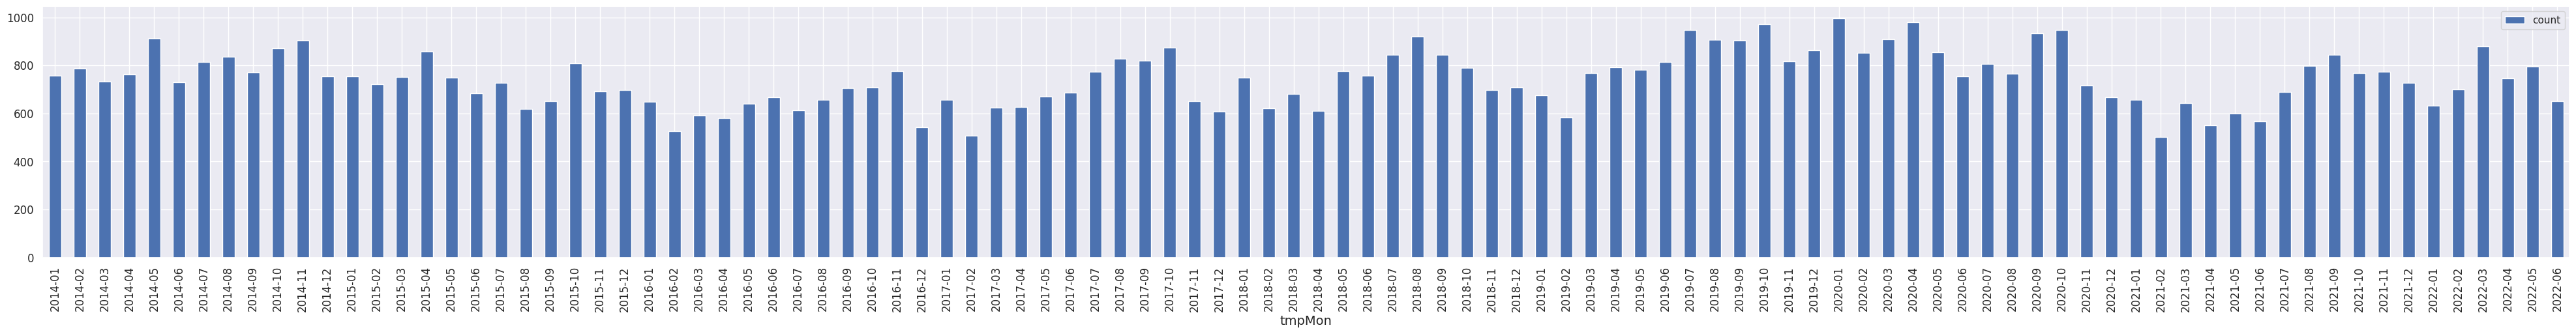

In [41]:
# create a representation of the month with strfmt
# define a tmpMon column to count all the cases by monthes
df['tmpMon'] = df['occurrencedate'].map(lambda dt: dt.strftime('%Y-%m'))

grouped_df = df.groupby('tmpMon').size().to_frame("count").reset_index()
grouped_df.plot(kind='bar', x='tmpMon', y='count',figsize=(50, 5))

<AxesSubplot: xlabel='tmpYear'>

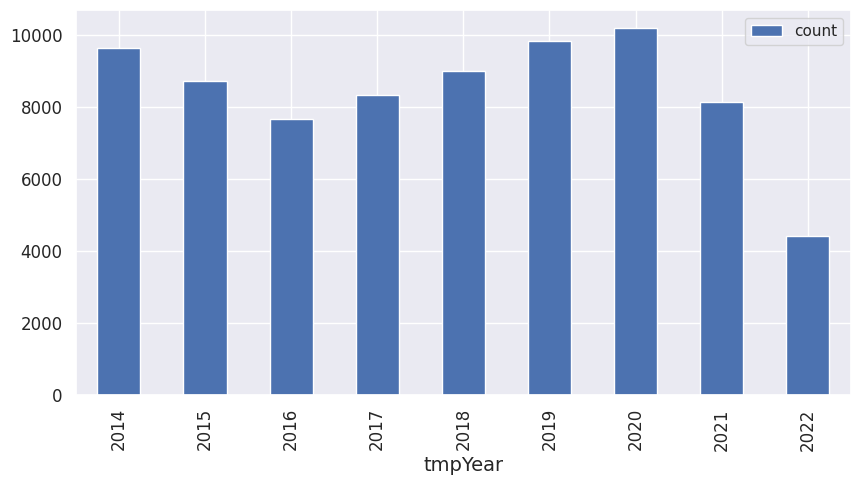

In [42]:
# create a representation of the year with stryear
# define a tmpYear to count all the cases by year
# 2022 only half year data
df['tmpYear'] = df['occurrencedate'].map(lambda dt: dt.strftime('%Y'))

grouped_df = df.groupby('tmpYear').size().to_frame("count").reset_index()
grouped_df.plot(kind='bar', x='tmpYear', y='count',figsize=(10, 5))

## 
## The least stolen cars is 2016 and the most is 2020
## 

<AxesSubplot: xlabel='premises_type'>

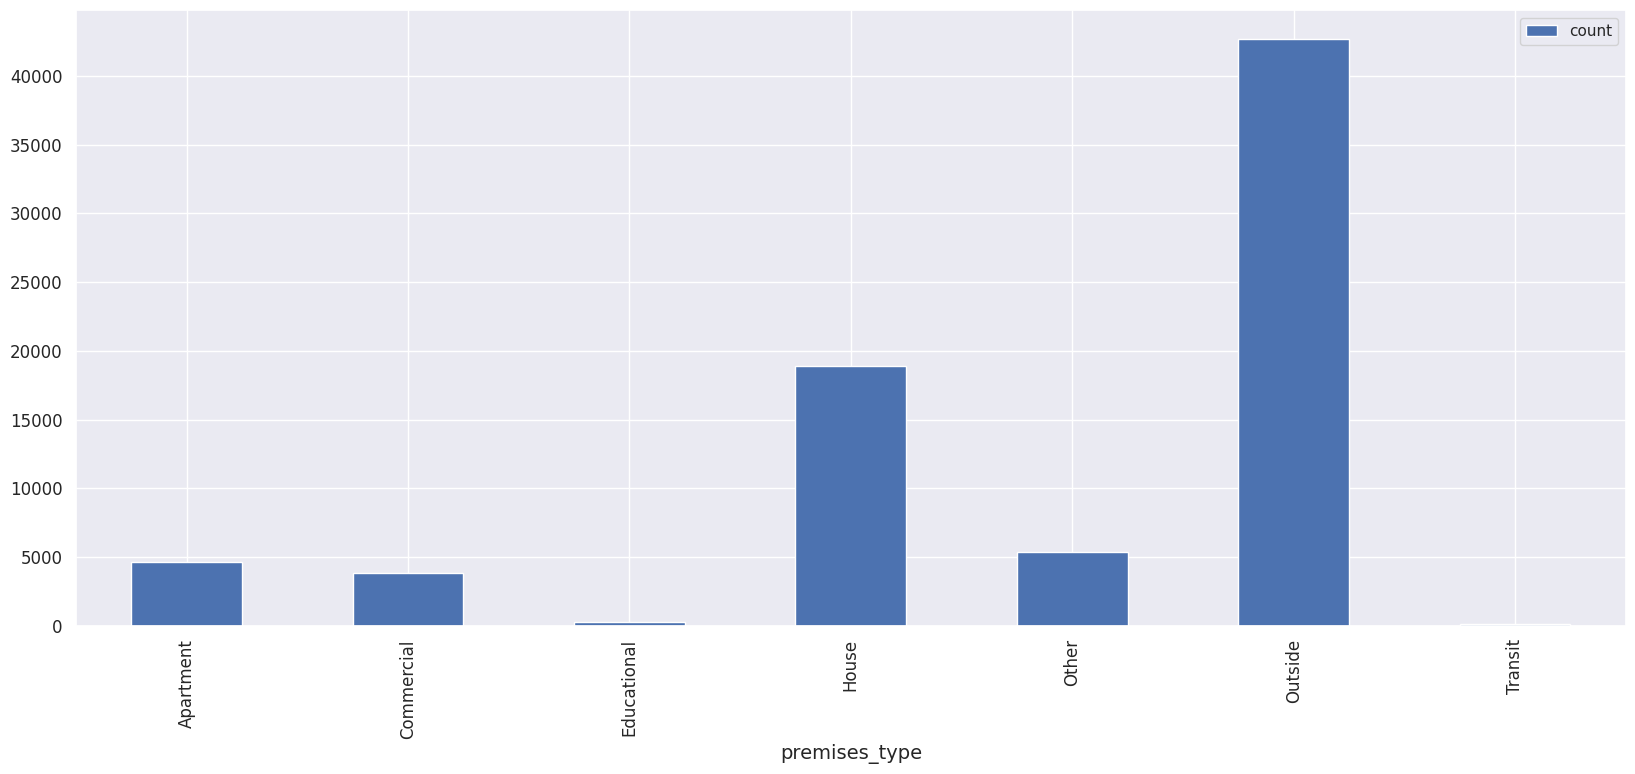

In [43]:
# according to the case premise type to plot the cases

grouped_df = df.groupby('premises_type').size().to_frame("count").reset_index()
grouped_df.plot(kind='bar', x='premises_type', y='count',figsize=(20, 8))

## 
## The most stolen cars are 'Outside' and 'House'
## 

<AxesSubplot: xlabel='Division'>

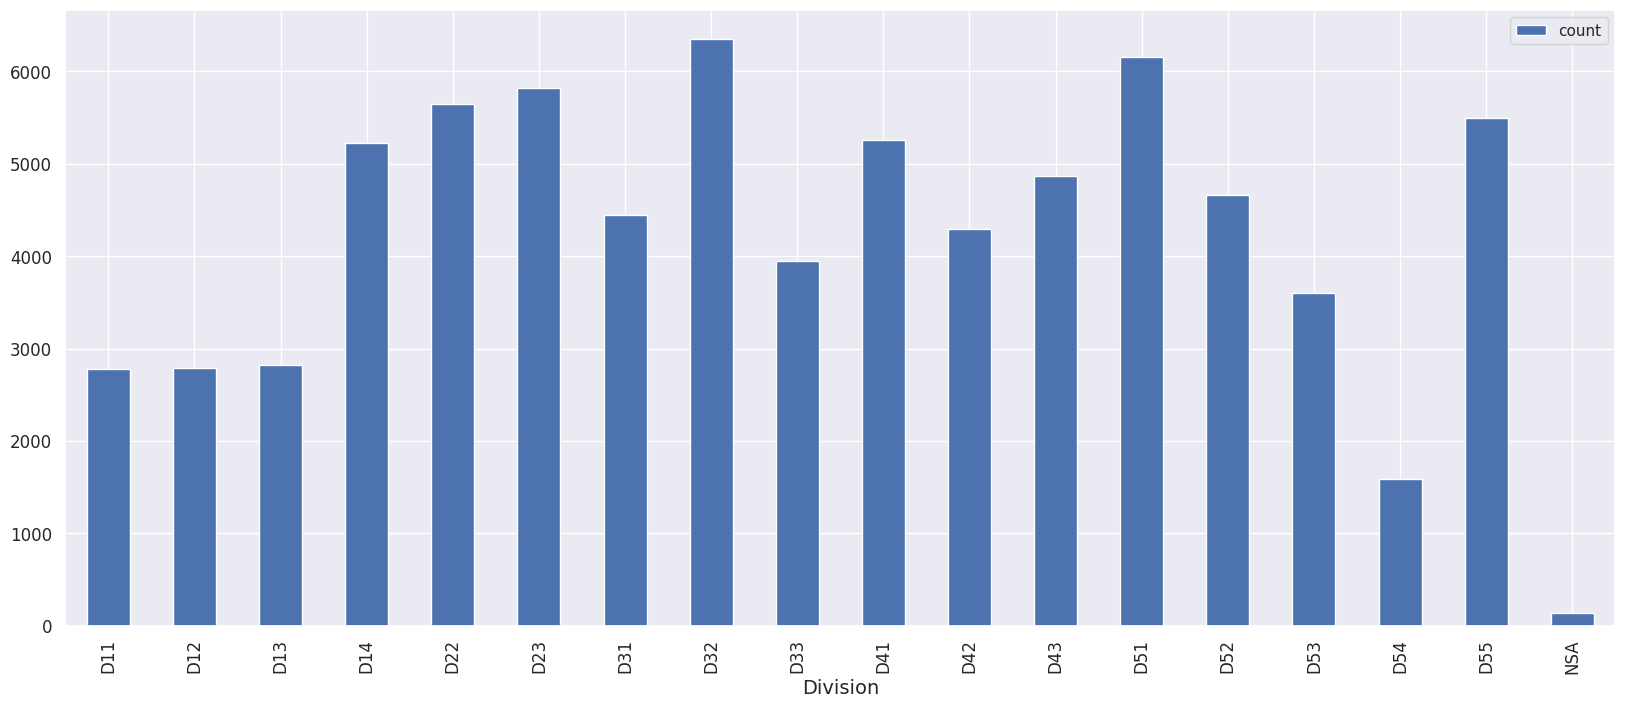

In [44]:
grouped_df = df.groupby('Division').size().to_frame("count").reset_index()
grouped_df.plot(kind='bar', x='Division', y='count',figsize=(20, 8))

In [45]:
df.groupby('Neighbourhood').size().to_frame("count").sort_values(by='count')

,count
Neighbourhood,
Beechborough-Greenbrook,118
Lambton Baby Point,124
Yonge-St.Clair,129
Caledonia-Fairbank,154
Blake-Jones,159
...,...
Islington-City Centre West,1643
Church-Yonge Corridor,2053
Waterfront Communities-The Island,2345


<AxesSubplot: xlabel='Neighbourhood'>

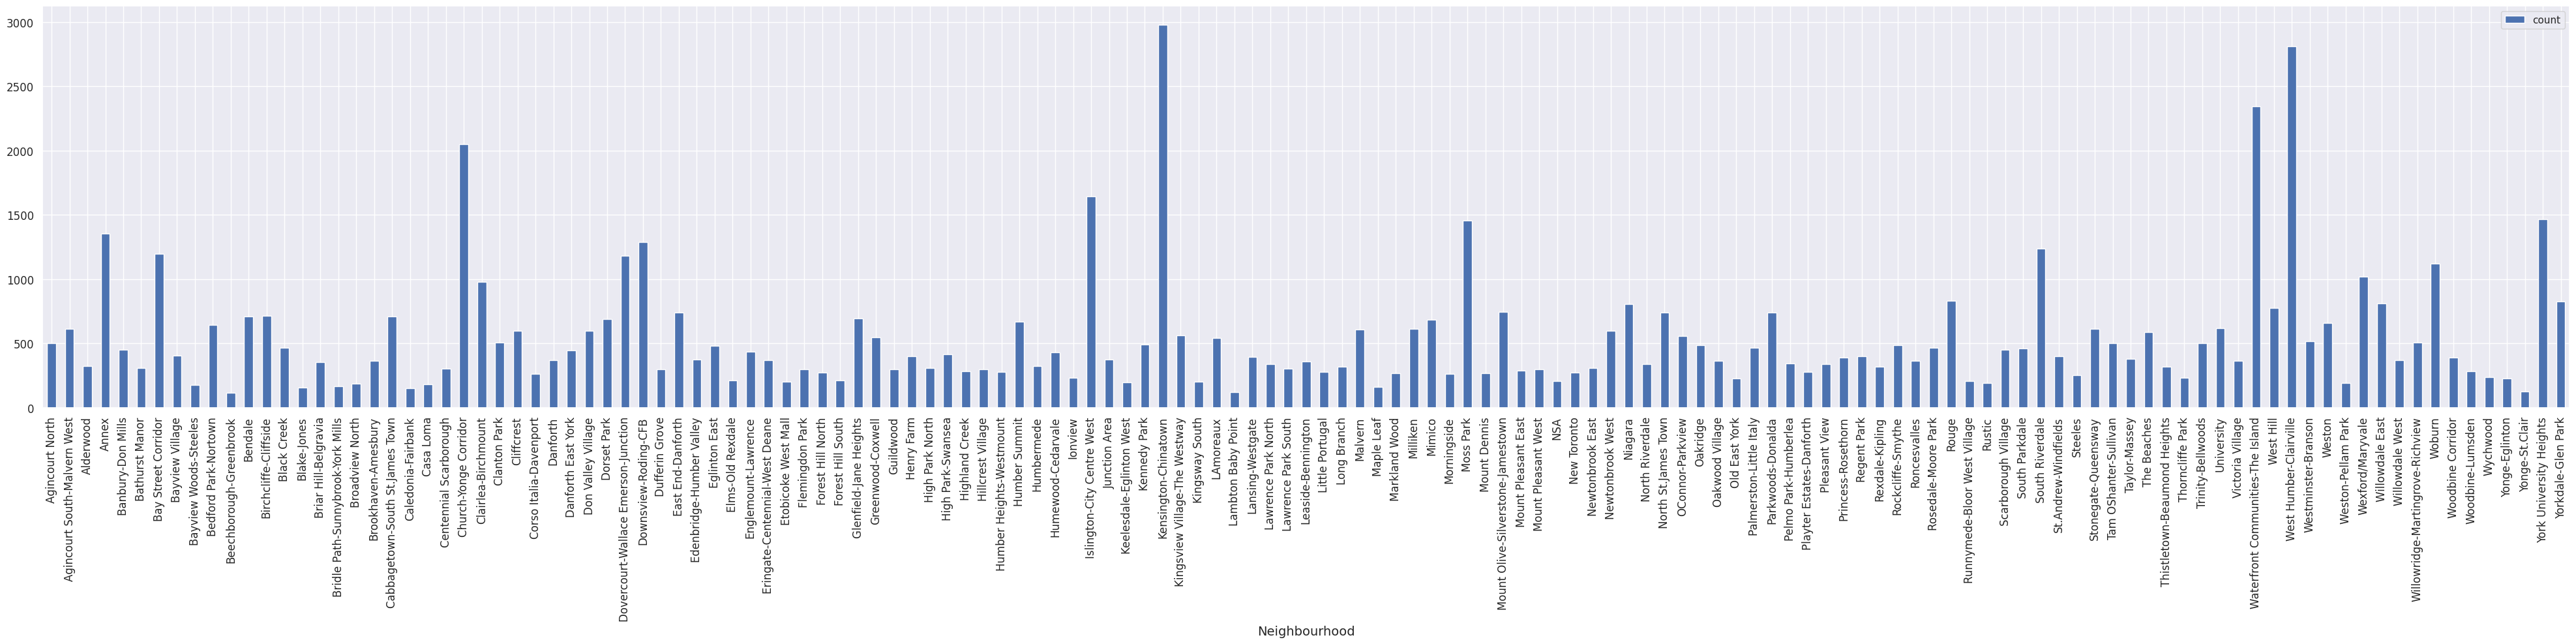

In [46]:
grouped_df = df.groupby('Neighbourhood').size().to_frame("count").reset_index()
grouped_df.plot(kind='bar', x='Neighbourhood', y='count',figsize=(50, 8))

## The most stolen cars neighbourhood 
## 
## Islington-City Centre West	1643
## Church-Yonge Corridor	2053
## Waterfront Communities-The Island	2345
## West Humber-Clairville	2814
## Kensington-Chinatown	2978
## 

In [47]:
# Use the geoPandas to plot the data
# we can get the shapefile for the open data of goverment
# https://open.toronto.ca/dataset/neighbourhoods/
fp = r"Neighbourhoods - 4326"
map_df = gpd.read_file(fp)
map_df.head()

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,geometry
0,1,2502366,26022881,None,174,174,South Eglinton-Davisville,South Eglinton-Davisville (174),Not an NIA or Emerging Neighbourhood,None,17824737,"POLYGON ((-79.38635 43.69783, -79.38623 43.697..."
1,2,2502365,26022880,None,173,173,North Toronto,North Toronto (173),Not an NIA or Emerging Neighbourhood,None,17824753,"POLYGON ((-79.39744 43.70693, -79.39837 43.706..."
2,3,2502364,26022879,None,172,172,Dovercourt Village,Dovercourt Village (172),Not an NIA or Emerging Neighbourhood,None,17824769,"POLYGON ((-79.43411 43.66015, -79.43537 43.659..."
3,4,2502363,26022878,None,171,171,Junction-Wallace Emerson,Junction-Wallace Emerson (171),Not an NIA or Emerging Neighbourhood,None,17824785,"POLYGON ((-79.43870 43.66766, -79.43841 43.666..."
4,5,2502362,26022877,None,170,170,Yonge-Bay Corridor,Yonge-Bay Corridor (170),Not an NIA or Emerging Neighbourhood,None,17824801,"POLYGON ((-79.38404 43.64497, -79.38502 43.644..."


In [48]:
# Merge Longitude and Latitude to the geometry type.
geometry=[Point(xy) for xy in zip(df['Longitude'],df['Latitude'])]

In [49]:
# geopandas to merge the data and mapdata
crs={'init':'epsg:4326'}
geo_df=gpd.GeoDataFrame(df,
                       crs=crs,
                       geometry=geometry)
geo_df.head()

/home/codespace/.python/current/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,Offence,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,tmpMon,tmpYear,geometry
0,GO-20141260616,D53,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,NonMCI,56,Leaside-Bennington,-79.370758,43.694274,2014-01,2014,POINT (-79.37076 43.69427)
2,GO-20141261694,D51,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,Theft From Motor Vehicle Under,NonMCI,77,Waterfront Communities-The Island,-79.375245,43.646361,2014-01,2014,POINT (-79.37525 43.64636)
6,GO-20141261501,D51,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,NonMCI,73,Moss Park,-79.374527,43.657066,2014-01,2014,POINT (-79.37453 43.65707)
14,GO-20141263347,D42,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,NonMCI,130,Milliken,-79.277134,43.817308,2014-01,2014,POINT (-79.27713 43.81731)
16,GO-20141262977,D11,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,NonMCI,85,South Parkdale,-79.465247,43.636355,2014-01,2014,POINT (-79.46525 43.63635)


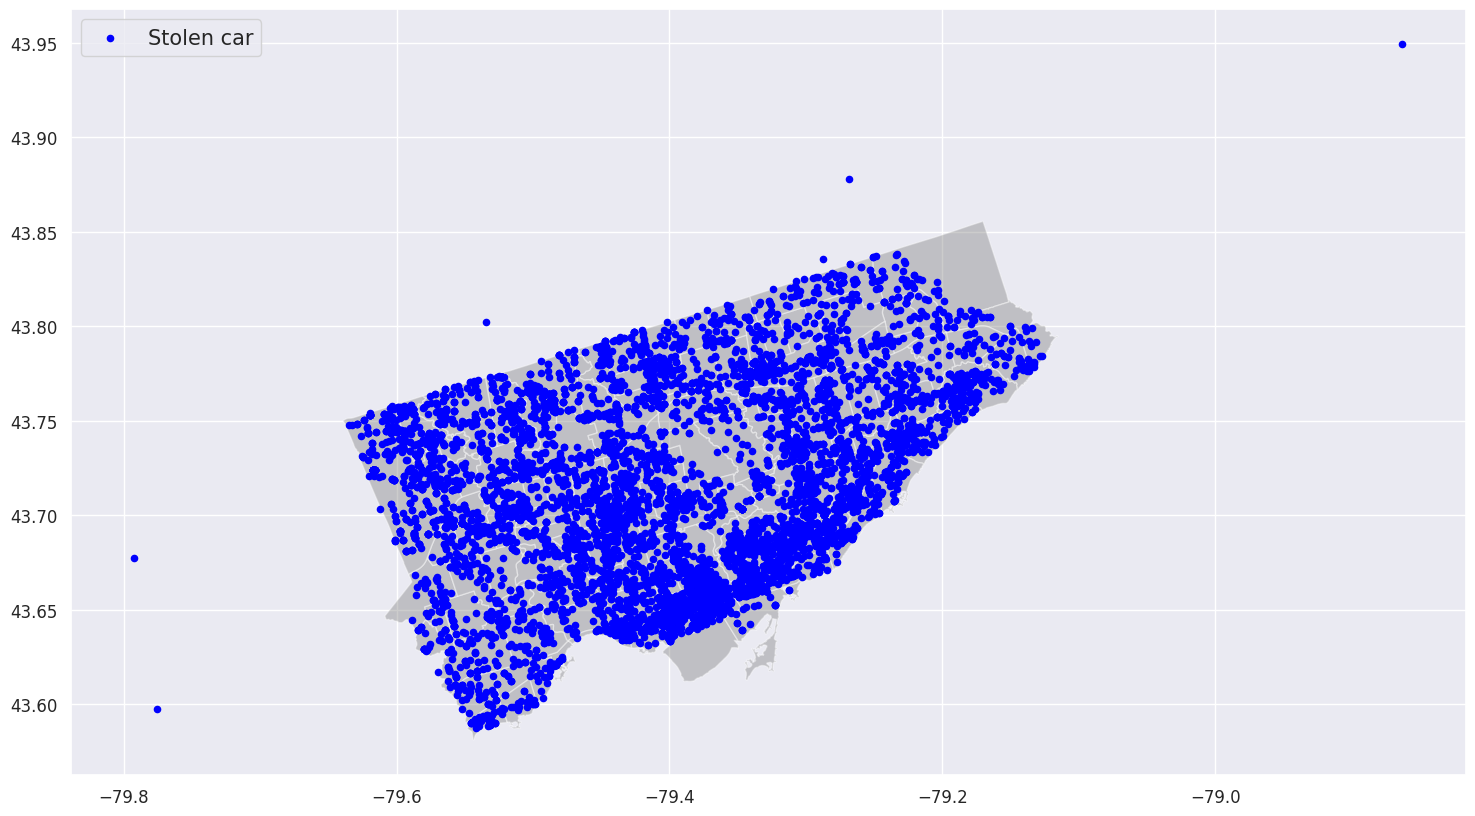

In [50]:
# Use geoPandas to plot the data on the map
start_date = '01-01-2021'
end_date = '12-01-2021'
fig,ax=plt.subplots(figsize=(18,18))
map_df.plot(ax=ax,alpha=0.4,color='grey')
geo_df.loc[(geo_df['occurrencedate'] >= start_date) & (geo_df['occurrencedate'] < end_date)].plot(ax=ax,markersize=20,color='blue',marker='o',label='Stolen car')
plt.legend(prop={'size':15})

# Clustering GPS Coordinates and Forming Regions

K-means is somewhat naive — it clusters the data into k clusters, even if k is not the right number of clusters to use. When we come to clustering, it’s hard to know how many clusters are optimal… In our dataset, how many clusters are optimal i.e. make sense, we don’t want to guess now do we? Therefore, when using k-means clustering, we need a way to determine whether we are using the right number of clusters.

## k-means clustering

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10), and for each value of k calculate the Sum of Squared Errors (SSE).

When K increases, the centroids are closer to the clusters centroids. The improvements will decline rapidly at some point, creating the elbow shape. That is the optimal value for K.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75856 entries, 0 to 76913
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   event_unique_id  75856 non-null  object             
 1   Division         75856 non-null  object             
 2   occurrencedate   75856 non-null  datetime64[ns, UTC]
 3   reporteddate     75856 non-null  object             
 4   location_type    75856 non-null  object             
 5   premises_type    75856 non-null  object             
 6   Offence          75856 non-null  object             
 7   mci_category     75856 non-null  object             
 8   Hood_ID          75856 non-null  object             
 9   Neighbourhood    75856 non-null  object             
 10  Longitude        75856 non-null  float64            
 11  Latitude         75856 non-null  float64            
 12  tmpMon           75856 non-null  object             
 13  tmpYear         

In [52]:
X=df.loc[:,['event_unique_id','Latitude','Longitude']]
X.head(10)
 

,event_unique_id,Latitude,Longitude
0,GO-20141260616,43.694274,-79.370758
2,GO-20141261694,43.646361,-79.375245
6,GO-20141261501,43.657066,-79.374527
14,GO-20141263347,43.817308,-79.277134
16,GO-20141262977,43.636355,-79.465247
17,GO-20141263029,43.622969,-79.481174
18,GO-20141263714,43.718907,-79.304428
19,GO-20141263153,43.690818,-79.565980
25,GO-20149000033,43.654456,-79.418745
28,GO-20149000046,43.652274,-79.401107


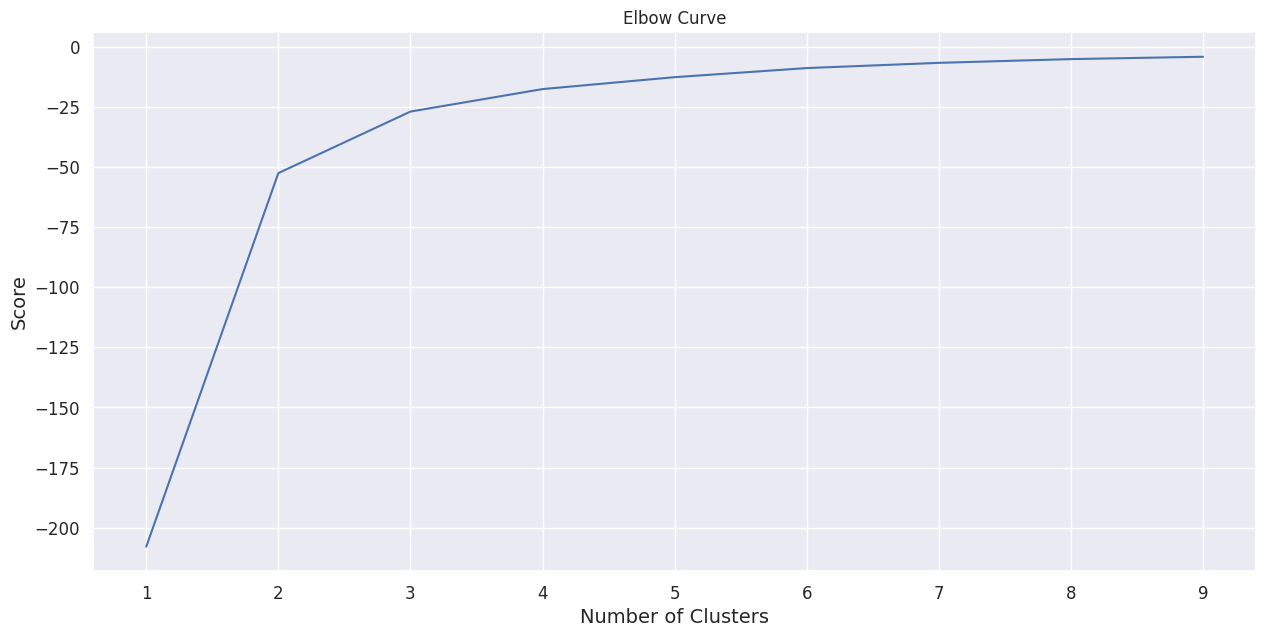

In [53]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

When we graph the plot, we see that the graph levels off slowly after 3 or 4 clusters. This implies that addition of more clusters will not help us that much.


In [54]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
geo_df['cluster_label'] = X['cluster_label']
geo_df.head(10)

,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,Offence,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,tmpMon,tmpYear,geometry,cluster_label
0,GO-20141260616,D53,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,NonMCI,56,Leaside-Bennington,-79.370758,43.694274,2014-01,2014,POINT (-79.37076 43.69427),3
2,GO-20141261694,D51,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,Theft From Motor Vehicle Under,NonMCI,77,Waterfront Communities-The Island,-79.375245,43.646361,2014-01,2014,POINT (-79.37525 43.64636),3
6,GO-20141261501,D51,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,NonMCI,73,Moss Park,-79.374527,43.657066,2014-01,2014,POINT (-79.37453 43.65707),3
14,GO-20141263347,D42,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,NonMCI,130,Milliken,-79.277134,43.817308,2014-01,2014,POINT (-79.27713 43.81731),0
16,GO-20141262977,D11,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,NonMCI,85,South Parkdale,-79.465247,43.636355,2014-01,2014,POINT (-79.46525 43.63635),3
17,GO-20141263029,D22,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,NonMCI,17,Mimico,-79.481174,43.622969,2014-01,2014,POINT (-79.48117 43.62297),1
18,GO-20141263714,D54,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,NonMCI,43,Victoria Village,-79.304428,43.718907,2014-01,2014,POINT (-79.30443 43.71891),0
19,GO-20141263153,D23,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,NonMCI,7,Willowridge-Martingrove-Richview,-79.565980,43.690818,2014-01,2014,POINT (-79.56598 43.69082),1
25,GO-20149000033,D14,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,NonMCI,81,Trinity-Bellwoods,-79.418745,43.654456,2014-01,2014,POINT (-79.41874 43.65446),3
28,GO-20149000046,D14,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft From Motor Vehicle Under,NonMCI,78,Kensington-Chinatown,-79.401107,43.652274,2014-01,2014,POINT (-79.40111 43.65227),3


###  Visualize the Results

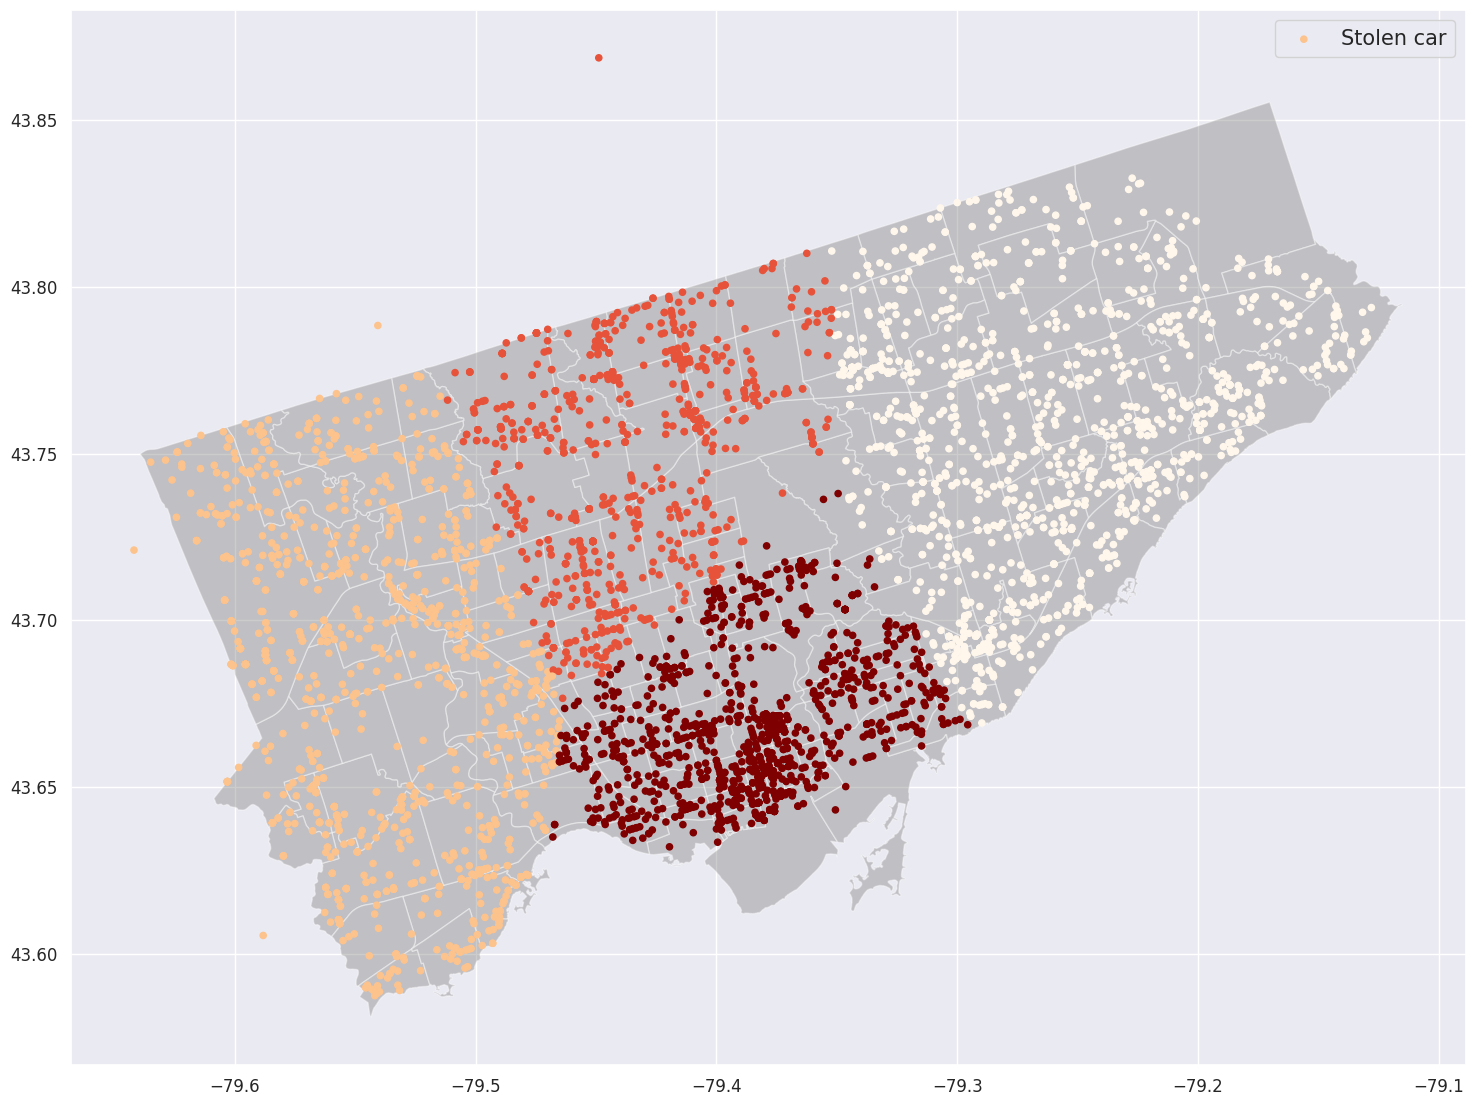

In [55]:
start_date = '01-01-2022'
end_date = '07-01-2022'
fig,ax=plt.subplots(figsize=(18,18))
map_df.plot(ax=ax,alpha=0.4,color='grey')
geo_df.loc[(geo_df['occurrencedate'] >= start_date) & (geo_df['occurrencedate'] < end_date)].plot(column='cluster_label', cmap='OrRd',ax=ax,markersize=20,marker='o',label='Stolen car')
plt.legend(prop={'size':15})

# Create an ARIMA Model for Time Series Forecasting

<AxesSubplot: xlabel='tmpMon'>

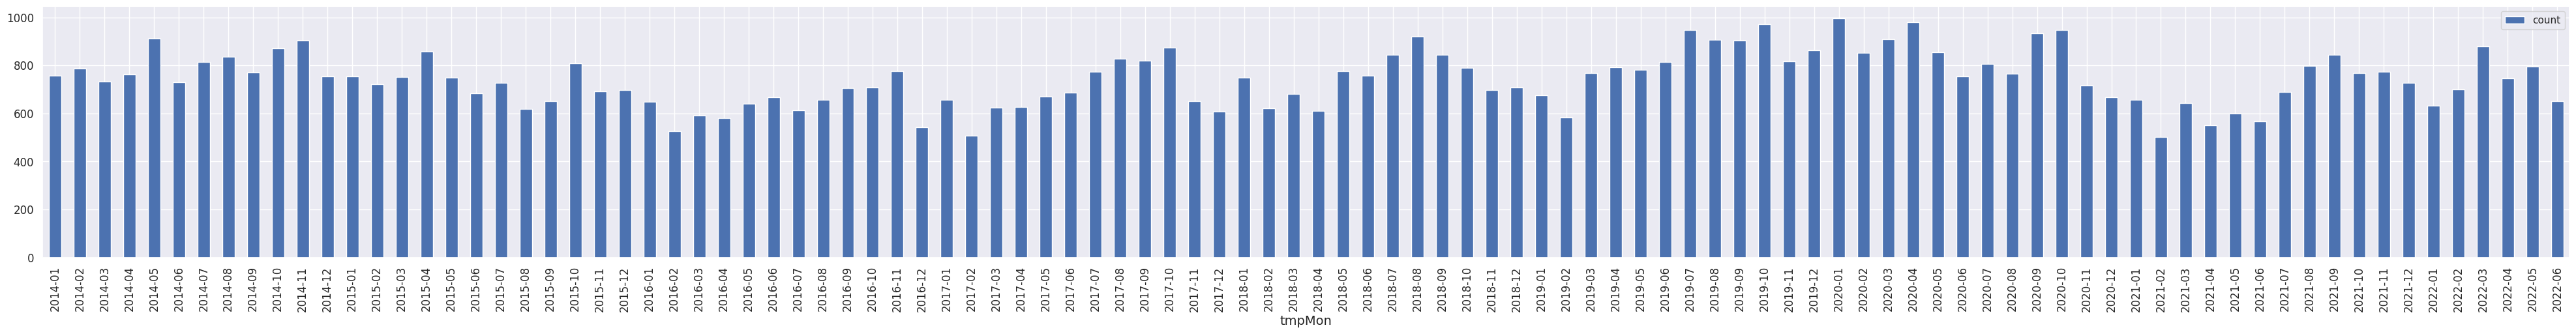

In [56]:
# create a representation of the month with strfmt

arima_df = df.groupby('tmpMon').size().to_frame("count").reset_index()
arima_df.plot(kind='bar', x='tmpMon', y='count',figsize=(50, 5))

In [57]:
#df['Date']= pd.to_datetime(df['Date'])
arima_df['tmpMon']=pd.to_datetime(arima_df['tmpMon'])
arima_df.set_index('tmpMon',inplace=True)

<AxesSubplot: xlabel='tmpMon'>

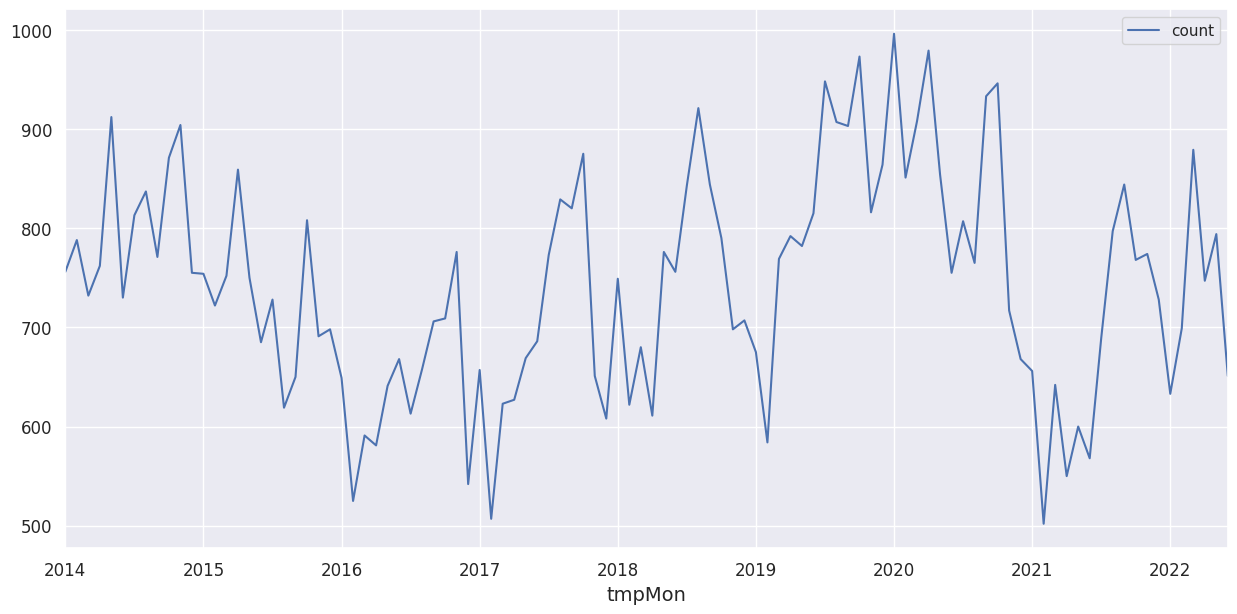

In [58]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
arima_df.plot()

In [59]:
from statsmodels.tsa.stattools import adfuller

In [60]:
test_result=adfuller(arima_df['count'])

In [61]:
def adfuller_test(count):
    result=adfuller(count)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(arima_df['count'])

ADF Test Statistic : -3.5329578798266974
p-value : 0.007179927463230255
#Lags Used : 1
Number of Observations : 100
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


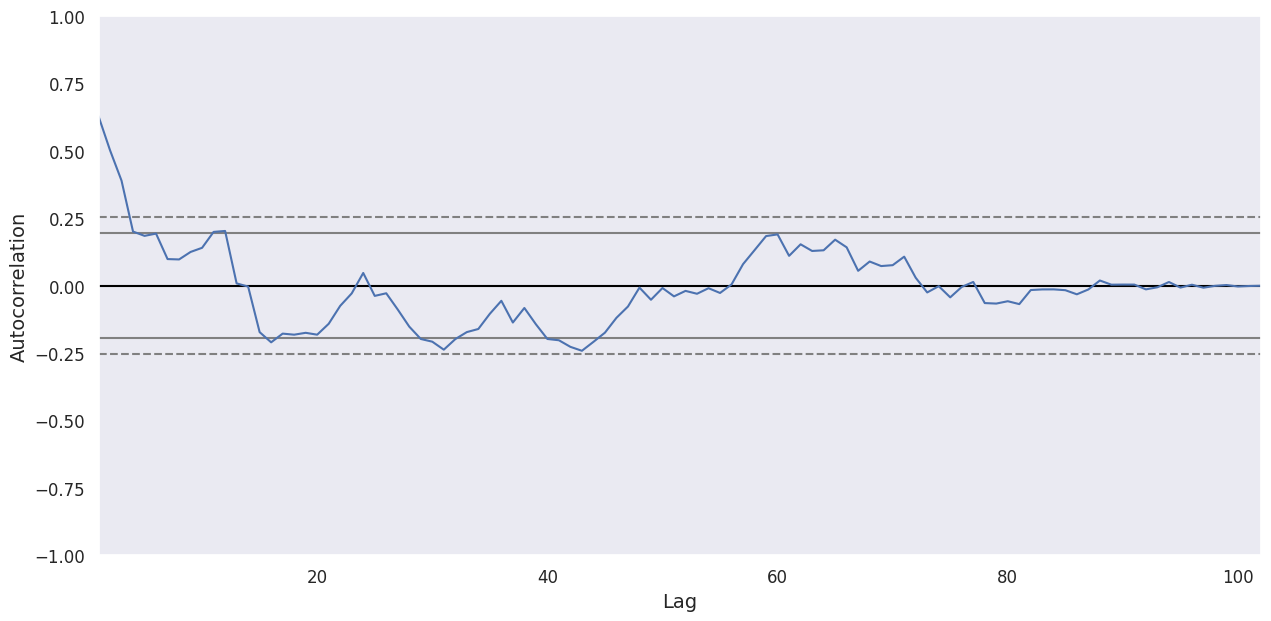

In [62]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(arima_df['count'])
plt.show()

In [63]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(arima_df['count'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                  102
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -596.260
Date:                Fri, 25 Nov 2022   AIC                           1198.519
Time:                        00:55:53   BIC                           1206.365
Sample:                    01-01-2014   HQIC                          1201.695
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5292      0.127      4.174      0.000       0.281       0.778
ma.L1         -0.8931      0.074    -12.024      0.000      -1.039      -0.747
sigma2      7806.8826   1331.084      5.865      0.000    5198.005    1.04e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                 2.42
Prob(Q):                              0.46   Prob(JB):                         0.30
Heteroskedasticity (H):               1.75   Skew:                            -0.21
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='tmpMon'>

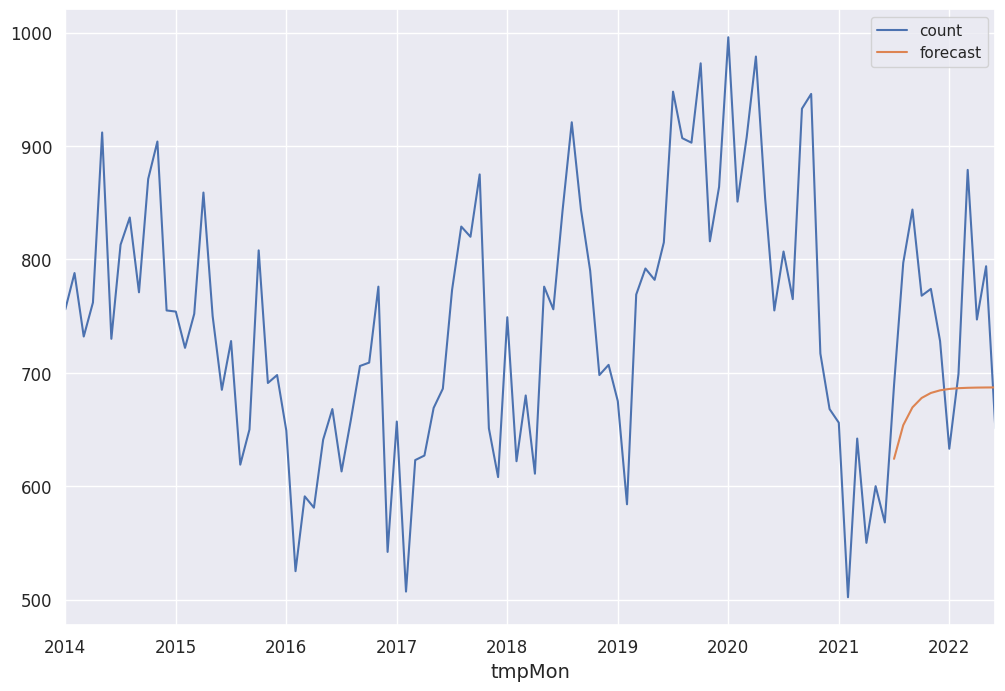

In [64]:
arima_df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
arima_df[['count','forecast']].plot(figsize=(12,8))

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.20034D+00    |proj g|=  3.11822D-02

At iterate    5    f=  5.19125D+00    |proj g|=  5.34008D-03

At iterate   10    f=  5.18987D+00    |proj g|=  3.77701D-03

At iterate   15    f=  5.16594D+00    |proj g|=  4.14159D-02

At iterate   20    f=  5.15513D+00    |proj g|=  1.61006D-03

At iterate   25    f=  5.15509D+00    |proj g|=  5.66391D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     28      1     0     0   

<AxesSubplot: xlabel='tmpMon'>

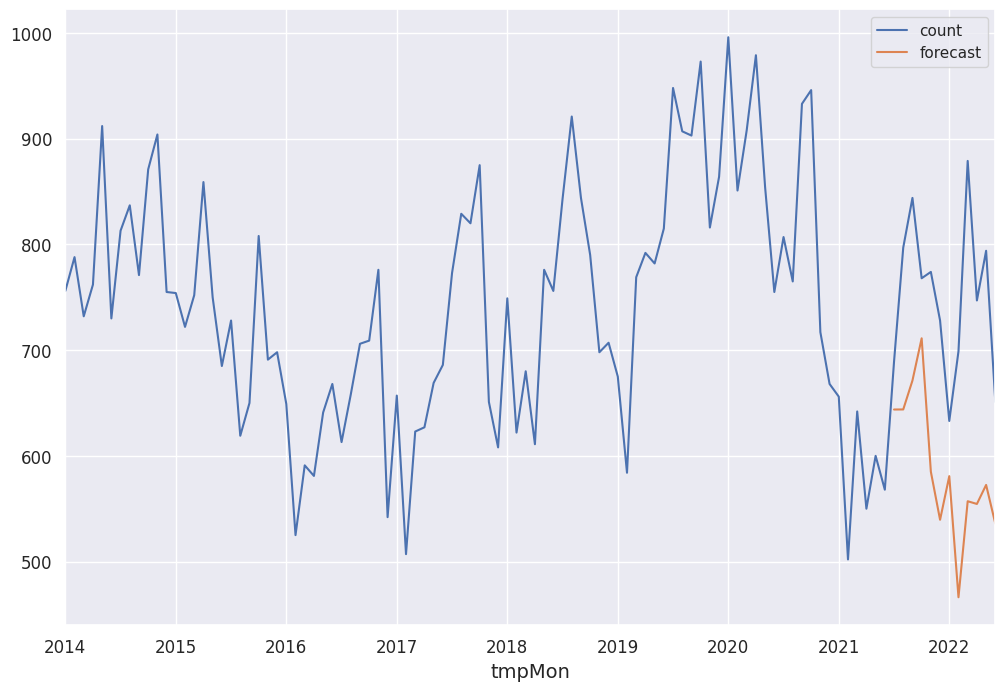

In [65]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(arima_df['count'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
arima_df['forecast']=results.predict(start=90,end=103,dynamic=True)
arima_df[['count','forecast']].plot(figsize=(12,8))

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot: >

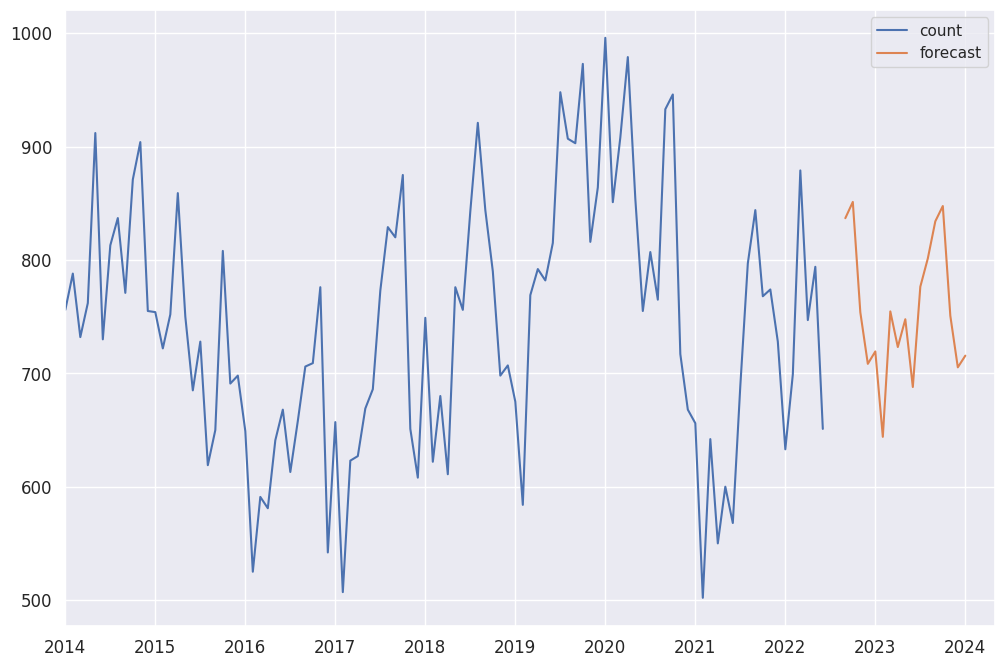

In [66]:
from pandas.tseries.offsets import DateOffset
future_dates=[arima_df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=arima_df.columns)

future_datest_df.tail()

future_df=pd.concat([arima_df,future_datest_df])

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['count', 'forecast']].plot(figsize=(12, 8))


### Time Series forecasting is really useful when we have to take future decisions or we have to do analysis, we can quickly do that using ARIMA, there are lots of other Models from we can do the time series forecasting.

   # Use tensorflow to ML

In 2019, Google released a new version of their TensorFlow deep learning library (TensorFlow 2) that integrated the Keras API directly and promoted this interface as the default or standard interface for deep learning development on the platform.

This integration is commonly referred to as the tf.keras interface or API (“tf” is short for “TensorFlow“). This is to distinguish it from the so-called standalone Keras open source project.

Standalone Keras: The standalone open source project that supports TensorFlow, Theano, and CNTK backends
tf.keras: The Keras API integrated into TensorFlow 2
Nowadays, since the features of other backends are dwarfed by TensorFlow 2, the latest Keras library supports only TensorFlow, and these two are the same.

In [67]:
# example of tf.keras python idiom
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


2022-11-25 00:55:56.405410: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-25 00:55:56.540183: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-25 00:55:56.540223: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-25 00:55:57.221556: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

### MLP for Binary Classification
### Classify structured data with feature columns

In [68]:
# we use the cluster_label to for the location and get the data from the geo_df datasets
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 75856 entries, 0 to 76913
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   event_unique_id  75856 non-null  object             
 1   Division         75856 non-null  object             
 2   occurrencedate   75856 non-null  datetime64[ns, UTC]
 3   reporteddate     75856 non-null  object             
 4   location_type    75856 non-null  object             
 5   premises_type    75856 non-null  object             
 6   Offence          75856 non-null  object             
 7   mci_category     75856 non-null  object             
 8   Hood_ID          75856 non-null  object             
 9   Neighbourhood    75856 non-null  object             
 10  Longitude        75856 non-null  float64            
 11  Latitude         75856 non-null  float64            
 12  tmpMon           75856 non-null  object             
 13  tmpYear 

### We can make the Offence type for the ML model output. So we want use the data to predict the Offence type.     

In [69]:
#tf_df= df[[ "occurrencedate","premises_type","Hood_ID","Latitude","Latitude"]]
tf_df= geo_df[[ "premises_type","Offence","Hood_ID","tmpYear","cluster_label"]]

# 2022 year we have only half year data.so we drop the 2022 data
tf_df.drop(tf_df.loc[tf_df['tmpYear']=='2022'].index, inplace=True)

/tmp/ipykernel_4362/882814362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_df.drop(tf_df.loc[tf_df['tmpYear']=='2022'].index, inplace=True)


In [70]:
for col in ['premises_type', 'Offence', 'Hood_ID', 'tmpYear','cluster_label']:
    tf_df[col] = tf_df[col].astype('category')

/tmp/ipykernel_4362/1926910800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_df[col] = tf_df[col].astype('category')
/tmp/ipykernel_4362/1926910800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_df[col] = tf_df[col].astype('category')
/tmp/ipykernel_4362/1926910800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [71]:
# In the original dataset "4" indicates the pet was not adopted.
tf_df['Offence'] = np.where(tf_df['Offence']=='Theft From Motor Vehicle Under', 0, 1)


/tmp/ipykernel_4362/43228467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_df['Offence'] = np.where(tf_df['Offence']=='Theft From Motor Vehicle Under', 0, 1)


## Split the dataframe into train, validation, and test

In [72]:
train, test = train_test_split(tf_df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

45729 train examples
11433 validation examples
14291 test examples


## Create an input pipeline using df_tf.data
### Next, we will wrap the dataframes with df_tf.data. This will enable us to use feature columns as a bridge to map from the columns in the Pandas dataframe to features used to train the model. 

In [73]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(df_tf, shuffle=True, batch_size=32):
  df_tf = df_tf.copy()
  labels = df_tf.pop('Offence')
  ds = tf.data.Dataset.from_tensor_slices((dict(df_tf), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(tf_df))
  ds = ds.batch(batch_size)
  return ds

In [74]:
batch_size = 5 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

2022-11-25 00:55:59.827923: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-25 00:55:59.827964: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-25 00:55:59.827989: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-448fbf): /proc/driver/nvidia/version does not exist
2022-11-25 00:55:59.828395: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Understand the input pipeline
### Now that we have created the input pipeline, let's call it to see the format of the data it returns. We have used a small batch size to keep the output readable.

In [75]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of tmpYear:', feature_batch['tmpYear'])
  print('A batch of Offence:', label_batch )

Every feature: ['premises_type', 'Hood_ID', 'tmpYear', 'cluster_label']
A batch of tmpYear: tf.Tensor([b'2019' b'2014' b'2019' b'2018' b'2016'], shape=(5,), dtype=string)
A batch of Offence: tf.Tensor([0 0 0 1 0], shape=(5,), dtype=int64)


### We can see that the dataset returns a dictionary of column names (from the dataframe) that map to column values from rows in the dataframe.

## Demonstrate several types of feature columns
### TensorFlow provides many types of feature columns. In this section, we will create several types of feature columns, and demonstrate how they transform a column from the dataframe.

In [76]:
# We will use this batch to demonstrate several types of feature columns
example_batch = next(iter(train_ds))[0]

In [77]:
# A utility method to create a feature column
# and to transform a batch of data
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())

## Categorical columns
### In this dataset, Type is represented as a string (e.g. 'Outside', or 'House'). We cannot feed strings directly to a model. Instead, we must first map them to numeric values. The categorical vocabulary columns provide a way to represent strings as a one-hot vector . The vocabulary can be passed as a list using categorical_column_with_vocabulary_list, or loaded from a file using categorical_column_with_vocabulary_file.

In [78]:
premises_type = feature_column.categorical_column_with_vocabulary_list(
      'premises_type', tf_df.premises_type.unique())
premises_type_embedding = feature_column.embedding_column(premises_type, dimension=8)
demo(premises_type_embedding)

[[ 0.3131101   0.46252856  0.2596779  -0.6578539   0.36743647  0.11367093
   0.24668652 -0.08062842]
 [-0.25576138 -0.42803714 -0.6174447  -0.01136414  0.04097647  0.20774892
   0.06405775 -0.00782864]
 [ 0.5225866  -0.09399129 -0.20159017  0.04536182 -0.27854404 -0.48249736
  -0.4731419  -0.37143746]
 [ 0.3131101   0.46252856  0.2596779  -0.6578539   0.36743647  0.11367093
   0.24668652 -0.08062842]
 [ 0.3131101   0.46252856  0.2596779  -0.6578539   0.36743647  0.11367093
   0.24668652 -0.08062842]]


In [79]:
tmpYear = feature_column.categorical_column_with_vocabulary_list(
      'tmpYear', tf_df.tmpYear.unique())
tmpYear_embedding = feature_column.embedding_column(tmpYear, dimension=8)
demo(tmpYear_embedding)

[[-0.6687458  -0.43808457 -0.4100015  -0.11849621  0.03363243  0.00962821
   0.58983517 -0.10166725]
 [ 0.10730291 -0.07737789  0.06054645  0.11217383  0.4189217  -0.5981058
   0.11384781 -0.1007698 ]
 [ 0.19429687 -0.54745066 -0.50334156 -0.32524893  0.27713594  0.1238051
  -0.6377381   0.37156513]
 [-0.67830324 -0.6452464  -0.4340069   0.23460121 -0.04435789 -0.2917636
  -0.13836771 -0.09464701]
 [-0.67830324 -0.6452464  -0.4340069   0.23460121 -0.04435789 -0.2917636
  -0.13836771 -0.09464701]]


In [80]:
cluster_label = feature_column.categorical_column_with_vocabulary_list(
      'cluster_label', tf_df.cluster_label.unique())

cluster_label_one_hot = feature_column.indicator_column(cluster_label)
demo(cluster_label_one_hot)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


## Embedding columns
### Suppose instead of having just a few possible strings, we have thousands (or more) values per category. For a number of reasons, as the number of categories grow large, it becomes infeasible to train a neural network using one-hot encodings. We can use an embedding column to overcome this limitation. Instead of representing the data as a one-hot vector of many dimensions, an embedding column represents that data as a lower-dimensional, dense vector in which each cell can contain any number, not just 0 or 1. The size of the embedding (8, in the example below) is a parameter that must be tuned.

In [81]:
# Notice the input to the embedding column is the categorical column
# we previously created
Hood_ID = feature_column.categorical_column_with_vocabulary_list(
      'Hood_ID', tf_df.Hood_ID.unique())
Hood_ID_embedding = feature_column.embedding_column(Hood_ID, dimension=8)
demo(Hood_ID_embedding)



[[-0.3929907   0.38093066  0.45644906 -0.3928117   0.27596042 -0.1781914
   0.04681492  0.57343334]
 [ 0.19724579  0.22880992 -0.5599321   0.44741714  0.5545907  -0.42276517
  -0.08422124  0.37364212]
 [ 0.1569039  -0.5205706   0.22422534 -0.18873441 -0.06436104  0.23071952
  -0.3349472  -0.15665066]
 [ 0.03517551 -0.01467882  0.4748698   0.58636945  0.14988467 -0.23704278
  -0.13622782  0.26873043]
 [ 0.38207334  0.14423978 -0.01950304  0.1688433   0.00777378 -0.3127242
   0.16260761 -0.06018981]]


## Numeric columns
### The output of a feature column becomes the input to the model (using the demo function defined above, we will be able to see exactly how each column from the dataframe is transformed). A numeric column is the simplest type of column. It is used to represent real valued features. When using this column, your model will receive the column value from the dataframe unchanged.

In [82]:
#for example
#photo_count = feature_column.numeric_column('PhotoAmt')
#demo(photo_count)

## Bucketized columns
### Often, you don't want to feed a number directly into the model, but instead split its value into different categories based on numerical ranges. Consider raw data that represents a person's age. Instead of representing age as a numeric column, we could split the age into several buckets using a bucketized column. Notice the one-hot values below describe which age range each row matches.

In [83]:
#for example
#age = feature_column.numeric_column('Age')
#age_buckets = feature_column.bucketized_column(age, boundaries=[1, 3, 5])
#demo(age_buckets)

## Hashed feature columns
### Another way to represent a categorical column with a large number of values is to use a categorical_column_with_hash_bucket. This feature column calculates a hash value of the input, then selects one of the hash_bucket_size buckets to encode a string. When using this column, you do not need to provide the vocabulary, and you can choose to make the number of hash_buckets significantly smaller than the number of actual categories to save space.

In [84]:
#for example
#breed1_hashed = feature_column.categorical_column_with_hash_bucket('Breed1', hash_bucket_size=10)
#demo(feature_column.indicator_column(breed1_hashed))

## Crossed feature columns
### Combining features into a single feature, better known as feature crosses, enables a model to learn separate weights for each combination of features. Here, we will create a new feature that is the cross of Age and Type. Note that crossed_column does not build the full table of all possible combinations (which could be very large). Instead, it is backed by a hashed_column, so you can choose how large the table is.

In [85]:
#for example
#crossed_feature = feature_column.crossed_column([age_buckets, animal_type], hash_bucket_size=10)
#demo(feature_column.indicator_column(crossed_feature))

## Choose which columns to use
### We have seen how to use several types of feature columns. Now we will use them to train a model. The goal  is to show you the complete code (e.g. mechanics) needed to work with feature columns. We have selected a few columns to train our model below arbitrarily.

In [86]:
feature_columns = []



In [87]:
#Categorical columns
cluster_label=feature_column.categorical_column_with_vocabulary_list(
       'cluster_label',tf_df.cluster_label.unique())
indicator_cluster_label=feature_column.indicator_column(cluster_label)
feature_columns.append(indicator_cluster_label)

In [88]:
#Categorical columns
Hood_ID = feature_column.categorical_column_with_vocabulary_list(
      'Hood_ID', tf_df.Hood_ID.unique())
Hood_ID_embedding = feature_column.embedding_column(Hood_ID, dimension=8)
feature_columns.append(Hood_ID_embedding)




In [89]:
#Categorical columns
tmpYear = feature_column.categorical_column_with_vocabulary_list(
      'tmpYear', tf_df.tmpYear.unique())
tmpYear_embedding = feature_column.embedding_column(tmpYear, dimension=8)
feature_columns.append(tmpYear_embedding)

In [90]:
#Embedding columns
premises_type = feature_column.categorical_column_with_vocabulary_list(
      'premises_type', tf_df.premises_type.unique())
premises_type_embedding = feature_column.embedding_column(premises_type, dimension=8)
feature_columns.append(premises_type_embedding)

## Create a feature layer
### Now that we have defined our feature columns, we will use a DenseFeatures layer to input them to our Keras model.

In [91]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

### Earlier, we used a small batch size to demonstrate how feature columns worked. We create a new input pipeline with a larger batch size.

In [92]:
batch_size = 1024
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

# Create, compile, and train the model

In [93]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.1),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=10)

Epoch 1/10
45/45 [==============================] - 2s 14ms/step - loss: 0.2306 - accuracy: 0.9692 - val_loss: 0.1453 - val_accuracy: 0.9679
Epoch 2/10
45/45 [==============================] - 0s 6ms/step - loss: 0.1369 - accuracy: 0.9692 - val_loss: 0.1390 - val_accuracy: 0.9679
Epoch 3/10
45/45 [==============================] - 0s 6ms/step - loss: 0.1348 - accuracy: 0.9692 - val_loss: 0.1383 - val_accuracy: 0.9679
Epoch 4/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1339 - accuracy: 0.9692 - val_loss: 0.1381 - val_accuracy: 0.9679
Epoch 5/10
45/45 [==============================] - 0s 6ms/step - loss: 0.1335 - accuracy: 0.9692 - val_loss: 0.1383 - val_accuracy: 0.9679
Epoch 6/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1333 - accuracy: 0.9692 - val_loss: 0.1377 - val_accuracy: 0.9679
Epoch 7/10
45/45 [==============================] - 0s 6ms/step - loss: 0.1328 - accuracy: 0.9692 - val_loss: 0.1374 - val_accuracy: 0.9679
Epoch 8/10
45/45 [=

# 
# Use the tensorflow to predict the data stolen car cases
# 

In [108]:
# create a representation of the day with strfmt
# define a tmpday column to count all the cases by days
# we will predict the casesnumber according the day period
df['tmpDay'] = df['occurrencedate'].map(lambda dt: dt.strftime('%Y-%m-%d'))



In [109]:
tf_df_day = df.groupby('tmpDay').size().to_frame("count").reset_index()
tf_df_day['tmpDay']=pd.to_datetime(tf_df_day['tmpDay'])
#tf_df_day.set_index('tmpDay',inplace=True)

ParserError: Unknown string format: 2014-01-d present at position 0

In [103]:
tf_df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   3103 non-null   int64
dtypes: int64(1)
memory usage: 24.4 KB


In [104]:
date_time = pd.to_datetime(tf_df_day.pop('tmpDay'), format='%d.%m.%Y %H:%M:%S')

KeyError: 'tmpDay'

In [ ]:
tf_df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   3103 non-null   int64
dtypes: int64(1)
memory usage: 24.4 KB


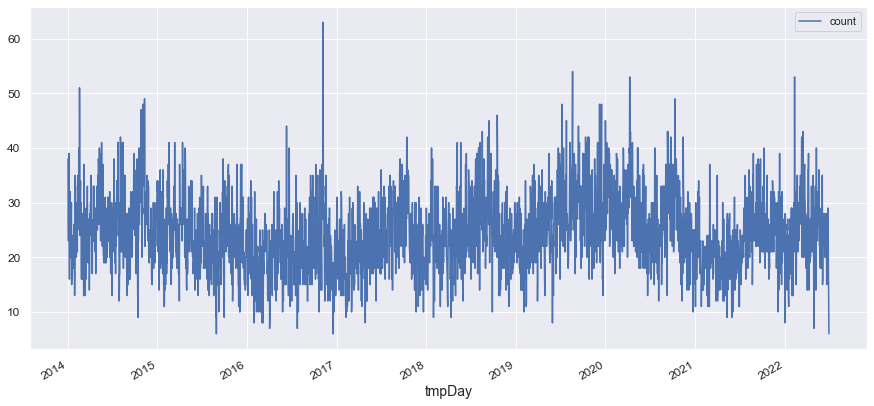

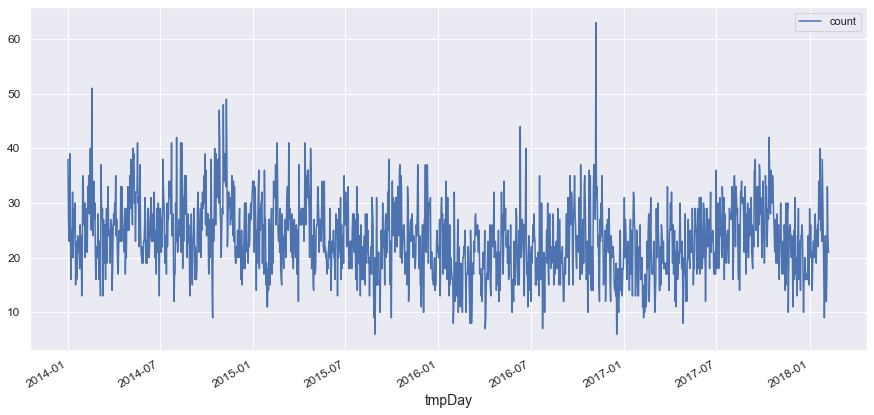

In [ ]:
plot_cols = ['count']
plot_features = tf_df_day[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = tf_df_day[plot_cols][:1500]
plot_features.index = date_time[:1500]
_ = plot_features.plot(subplots=True)

In [ ]:
tf_df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   3103 non-null   int64
dtypes: int64(1)
memory usage: 24.4 KB


In [ ]:
date_time.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3103 entries, 0 to 3102
Series name: tmpDay
Non-Null Count  Dtype              
--------------  -----              
3103 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 24.4 KB


In [ ]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

### This gives the model access to the most important frequency features. In this case you knew ahead of time which frequencies were important.

### If you don't have that information, you can determine which frequencies are important by extracting features with Fast Fourier Transform. 
To check the assumptions, here is the tf.signal.rfft of the temperature over time. 
Note the obvious peaks at frequencies near 1/year and 1/day:

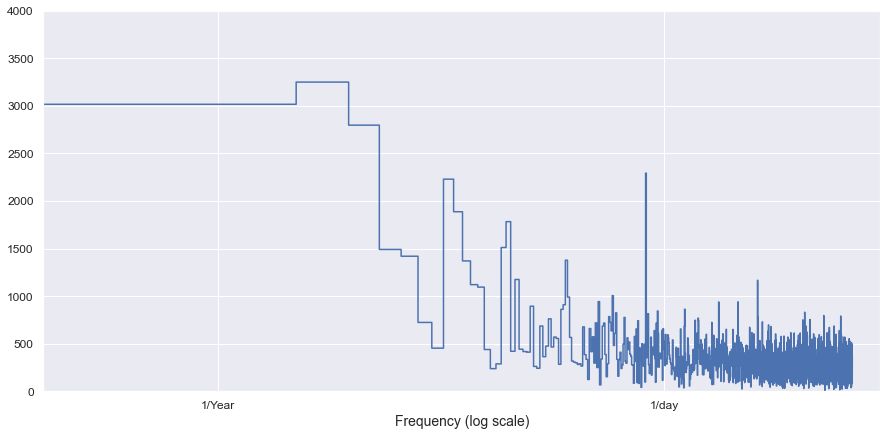

In [ ]:
import IPython
import IPython.display
fft = tf.signal.rfft(tf_df_day['count'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(tf_df_day['count'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 4000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

# Split the data
You'll use a (70%, 20%, 10%) split for the training, validation, and test sets. Note the data is not being randomly shuffled before splitting. This is for two reasons:

It ensures that chopping the data into windows of consecutive samples is still possible.
It ensures that the validation/test results are more realistic, being evaluated on the data collected after the model was trained.

In [ ]:
column_indices = {name: i for i, name in enumerate(tf_df_day.columns)}

n = len(tf_df_day)
train_df = tf_df_day[0:int(n*0.7)]
val_df = tf_df_day[int(n*0.7):int(n*0.9)]
test_df = tf_df_day[int(n*0.9):]

num_features = tf_df_day.shape[1]

# Normalize the data
It is important to scale features before training a neural network. Normalization is a common way of doing this scaling: subtract the mean and divide by the standard deviation of each feature.

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages. That's not the focus of this tutorial, and the validation and test sets ensure that you get (somewhat) honest metrics. So, in the interest of simplicity this tutorial uses a simple average.

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

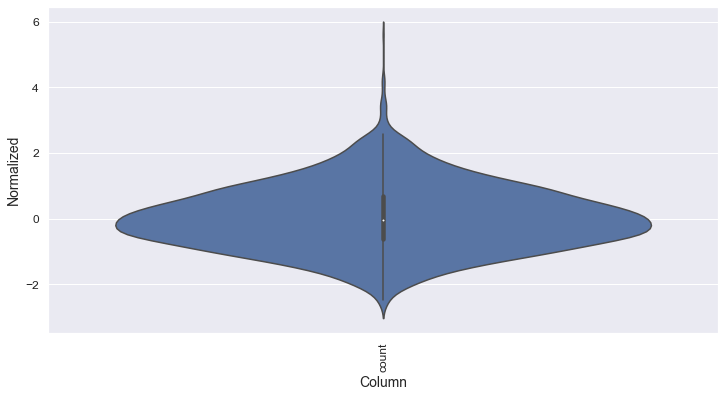

In [ ]:
df_std = (tf_df_day - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(tf_df_day.keys(), rotation=90)

# Data windowing
The models in this prodect will make a set of predictions based on a window of consecutive samples from the data.

The main features of the input windows are:

The width (number of time steps) of the input and label windows.
The time offset between them.
Which features are used as inputs, labels, or both.
This project builds a variety of models (including Linear, DNN, CNN and RNN models), and uses them for both:

Single-output, and multi-output predictions.
Single-time-step and multi-time-step predictions.
This section focuses on implementing the data windowing so that it can be reused for all of those models.

Depending on the task and type of model you may want to generate a variety of data windows. Here are some examples:

For example, to make a single prediction 24 hours into the future, given 24 hours of history, you might define a window like this:

One prediction 24 hours into the future.

A model that makes a prediction one hour into the future, given six hours of history, would need a window like this:

One prediction one hour into the future.

The rest of this section defines a WindowGenerator class. This class can:

Handle the indexes and offsets as shown in the diagrams above.
Split windows of features into (features, labels) pairs.
Plot the content of the resulting windows.
Efficiently generate batches of these windows from the training, evaluation, and test data, using tf.data.Datasets.
1. Indexes and offsets
Start by creating the WindowGenerator class. The __init__ method includes all the necessary logic for the input and label indices.

It also takes the training, evaluation, and test DataFrames as input. These will be converted to tf.data.Datasets of windows later.

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w1 = WindowGenerator(input_width=90, label_width=1, shift=10,
                     label_columns=['count'])
w1

Total window size: 100
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Label indices: [99]
Label column name(s): ['count']

In [ ]:
w2 = WindowGenerator(input_width=9, label_width=1, shift=1,
                     label_columns=['count'])
w2

Total window size: 10
Input indices: [0 1 2 3 4 5 6 7 8]
Label indices: [9]
Label column name(s): ['count']

# 2. Split
Given a list of consecutive inputs, the split_window method will convert them to a window of inputs and a window of labels.

The example w2 you define earlier will be split like this:

The initial window is all consecutive samples, this splits it into an (inputs, labels) pairs

This diagram doesn't show the features axis of the data, but this split_window function also handles the label_columns so it can be used for both the single output and multi-output examples.

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
#Try it out
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 10, 1)
Inputs shape: (3, 9, 1)
Labels shape: (3, 1, 1)


Typically, data in TensorFlow is packed into arrays where the outermost index is across examples (the "batch" dimension). The middle indices are the "time" or "space" (width, height) dimension(s). The innermost indices are the features.

The code above took a batch of three 7-time step windows with 19 features at each time step. It splits them into a batch of 6-time step 19-feature inputs, and a 1-time step 1-feature label. The label only has one feature because the WindowGenerator was initialized with label_columns=['count']. Initially, this tutorial will build models that predict single output labels.

# 3. Plot
Here is a plot method that allows a simple visualization of the split window:

In [ ]:
w2.example = example_inputs, example_labels

In [ ]:
def plot(self, model=None, plot_col='count', max_subplots=1):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [D]')

WindowGenerator.plot = plot

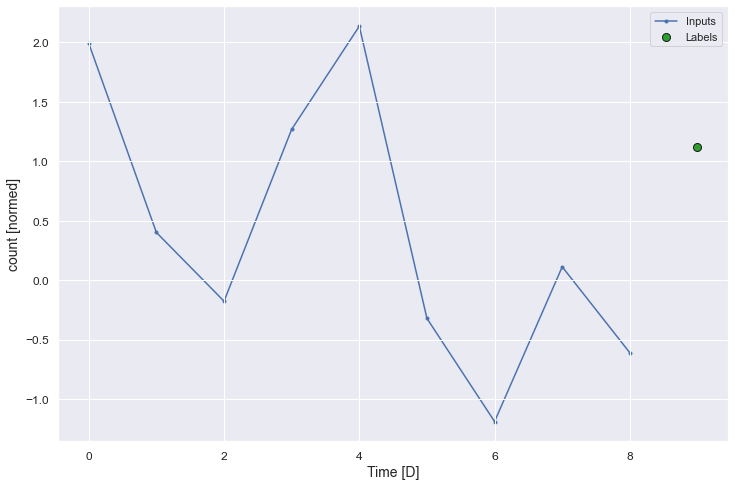

In [ ]:
w2.plot()

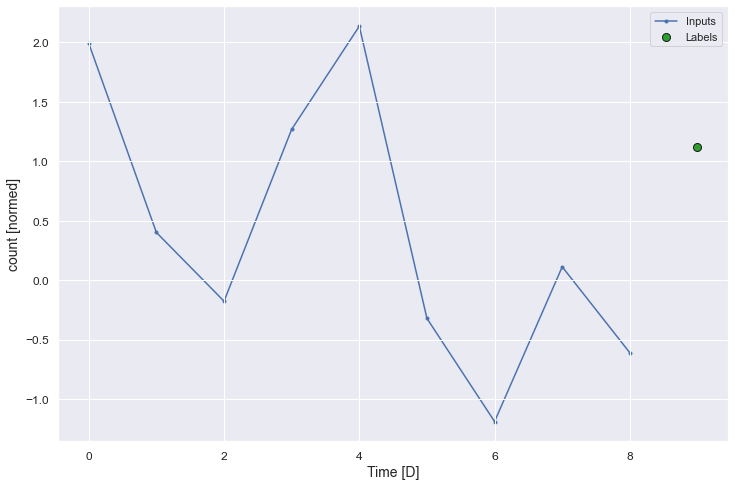

In [ ]:
w2.plot(plot_col='count')

# 4. Create tf.data.Datasets
Finally, this make_dataset method will take a time series DataFrame and convert it to a tf.data.Dataset of (input_window, label_window) pairs using the tf.keras.utils.timeseries_dataset_from_array function:

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

The WindowGenerator object holds training, validation, and test data.

Add properties for accessing them as tf.data.Datasets using the make_dataset method you defined earlier. Also, add a standard example batch for easy access and plotting:

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

Now, the WindowGenerator object gives you access to the tf.data.Dataset objects, so you can easily iterate over the data.

The Dataset.element_spec property tells you the structure, data types, and shapes of the dataset elements.

In [ ]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 9, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

Iterating over a Dataset yields concrete batches:

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 9, 1)
Labels shape (batch, time, features): (32, 1, 1)


## Single step models
The simplest model you can build on this sort of data is one that predicts a single feature's value—1 time step (one day) into the future based only on the current conditions.

So, start by building models to predict the count value one day into the future.

Predict the next time step

Configure a WindowGenerator object to produce these single-step (input, label) pairs:

In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['count'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['count']

The window object creates tf.data.Datasets from the training, validation, and test sets, allowing you to easily iterate over batches of data.

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 1)
Labels shape (batch, time, features): (32, 1, 1)


## Baseline
Before building a trainable model it would be good to have a performance baseline as a point for comparison with the later more complicated models.

This first task is to predict count one day into the future, given the current value of all features. The current values include the current count.

So, start with a model that just returns the current count as the prediction, predicting "No change". This is a reasonable baseline since count changes slowly. Of course, this baseline will work less well if you make a prediction further in the future.

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

Instantiate and evaluate this model:

In [ ]:
baseline = Baseline(label_index=column_indices['count'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

20/20 [==============================] - 0s 2ms/step - loss: 1.1885 - mean_absolute_error: 0.8543


That printed some performance metrics, but those don't give you a feeling for how well the model is doing.

The WindowGenerator has a plot method, but the plots won't be very interesting with only a single sample.

So, create a wider WindowGenerator that generates windows 30 days of consecutive inputs and labels at a time. The new wide_window variable doesn't change the way the model operates. The model still makes predictions one hour into the future based on a single input time step. Here, the time axis acts like the batch axis: each prediction is made independently with no interaction between time steps:

In [ ]:
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1,
    label_columns=['count'])

wide_window

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['count']

This expanded window can be passed directly to the same baseline model without any code changes. This is possible because the inputs and labels have the same number of time steps, and the baseline just forwards the input to the output:

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 30, 1)
Output shape: (32, 30, 1)


By plotting the baseline model's predictions, notice that it is simply the labels shifted right by one hour:

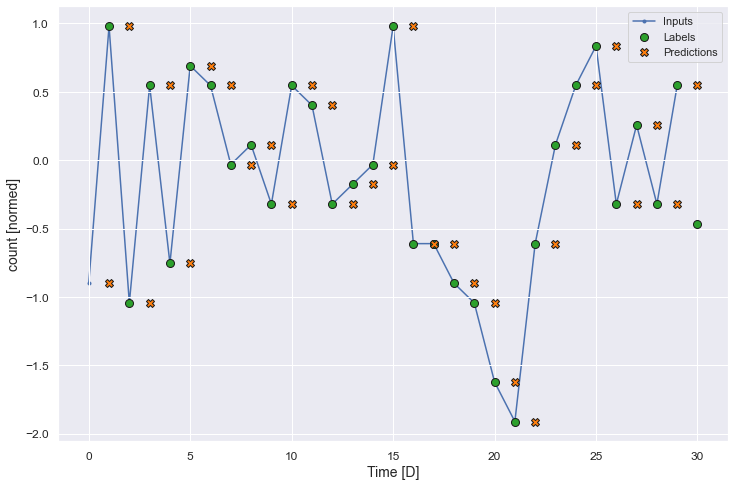

In [ ]:
wide_window.plot(baseline)

In the above plots of three examples the single step model is run over the course of 30 days. This deserves some explanation:

The blue Inputs line shows the input temperature at each time step. The model receives all features, this plot only shows the temperature.
The green Labels dots show the target prediction value. These dots are shown at the prediction time, not the input time. That is why the range of labels is shifted 1 step relative to the inputs.
The orange Predictions crosses are the model's prediction's for each output time step. If the model were predicting perfectly the predictions would land directly on the Labels.

## Linear model
The simplest trainable model you can apply to this task is to insert linear transformation between the input and output. In this case the output from a time step only depends on that step:

A single step prediction

A tf.keras.layers.Dense layer with no activation set is a linear model. The layer only transforms the last axis of the data from (batch, time, inputs) to (batch, time, units); it is applied independently to every item across the batch and time axes.

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 1)
Output shape: (32, 1, 1)


In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

Train the model and evaluate its performance:

In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
68/68 [==============================] - 1s 5ms/step - loss: 0.8542 - mean_absolute_error: 0.7338 - val_loss: 0.8946 - val_mean_absolute_error: 0.7536
Epoch 2/20
68/68 [==============================] - 0s 3ms/step - loss: 0.8538 - mean_absolute_error: 0.7336 - val_loss: 0.8933 - val_mean_absolute_error: 0.7529
Epoch 3/20
68/68 [==============================] - 0s 3ms/step - loss: 0.8537 - mean_absolute_error: 0.7335 - val_loss: 0.8915 - val_mean_absolute_error: 0.7517
Epoch 4/20
68/68 [==============================] - 0s 3ms/step - loss: 0.8536 - mean_absolute_error: 0.7334 - val_loss: 0.8912 - val_mean_absolute_error: 0.7514
Epoch 5/20
68/68 [==============================] - 0s 3ms/step - loss: 0.8536 - mean_absolute_error: 0.7334 - val_loss: 0.8904 - val_mean_absolute_error: 0.7508
Epoch 6/20
68/68 [==============================] - 0s 3ms/step - loss: 0.8536 - mean_absolute_error: 0.7334 - val_loss: 0.8904 - val_mean_absolute_error: 0.7509
Epoch 7/20
68/68 [==========

Like the baseline model, the linear model can be called on batches of wide windows. Used this way the model makes a set of independent predictions on consecutive time steps. The time axis acts like another batch axis. There are no interactions between the predictions at each time step.

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 30, 1)
Output shape: (32, 30, 1)


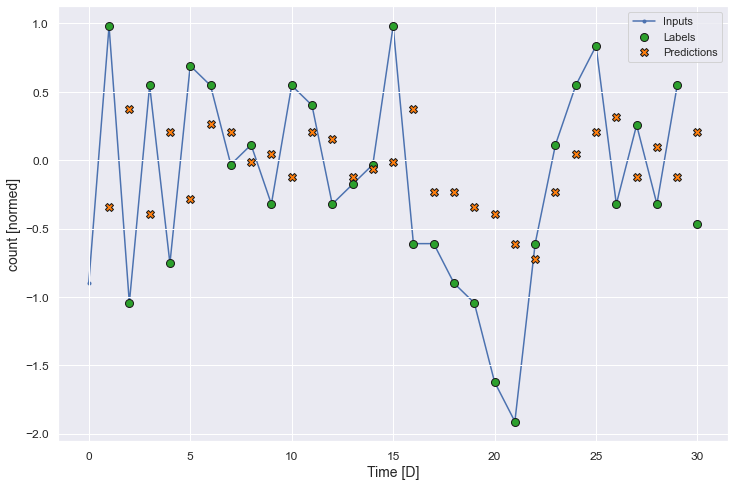

In [ ]:
wide_window.plot(linear)

One advantage to linear models is that they're relatively simple to interpret. You can pull out the layer's weights and visualize the weight assigned to each input:

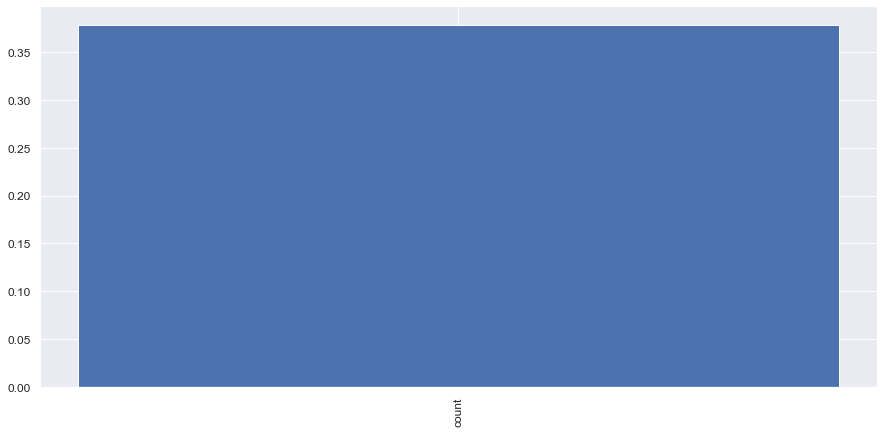

In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

# Dense
Before applying models that actually operate on multiple time-steps, it's worth checking the performance of deeper, more powerful, single input step models.

Here's a model similar to the linear model, except it stacks several a few Dense layers between the input and the output:

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
68/68 [==============================] - 1s 5ms/step - loss: 0.8682 - mean_absolute_error: 0.7386 - val_loss: 0.9007 - val_mean_absolute_error: 0.7512
Epoch 2/20
68/68 [==============================] - 0s 4ms/step - loss: 0.8585 - mean_absolute_error: 0.7359 - val_loss: 0.8867 - val_mean_absolute_error: 0.7440
Epoch 3/20
68/68 [==============================] - 0s 4ms/step - loss: 0.8579 - mean_absolute_error: 0.7362 - val_loss: 0.8833 - val_mean_absolute_error: 0.7434
Epoch 4/20
68/68 [==============================] - 0s 4ms/step - loss: 0.8561 - mean_absolute_error: 0.7353 - val_loss: 0.8946 - val_mean_absolute_error: 0.7487
Epoch 5/20
20/20 [==============================] - 0s 2ms/step - loss: 0.8950 - mean_absolute_error: 0.7494


## Multi-step dense
A single-time-step model has no context for the current values of its inputs. It can't see how the input features are changing over time. To address this issue the model needs access to multiple time steps when making predictions:

Three time steps are used for each prediction.

The baseline, linear and dense models handled each time step independently. Here the model will take multiple time steps as input to produce a single output.

Create a WindowGenerator that will produce batches of three-hour inputs and one-hour labels:

Note that the Window's shift parameter is relative to the end of the two windows.



In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['count'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['count']

Text(0.5, 1.0, 'Given 3 day of inputs, predict 1 day into the future.')

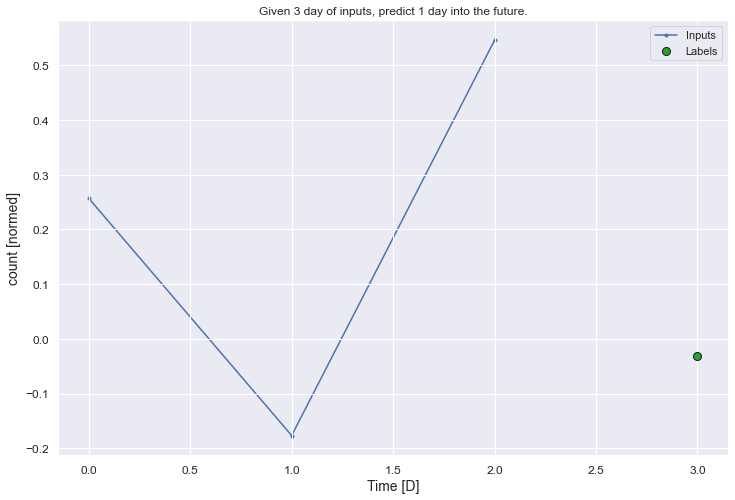

In [ ]:
conv_window.plot()
plt.title("Given 3 day of inputs, predict 1 day into the future.")

You could train a dense model on a multiple-input-step window by adding a tf.keras.layers.Flatten as the first layer of the model:

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 1)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

20/20 [==============================] - 0s 2ms/step - loss: 0.7836 - mean_absolute_error: 0.7026


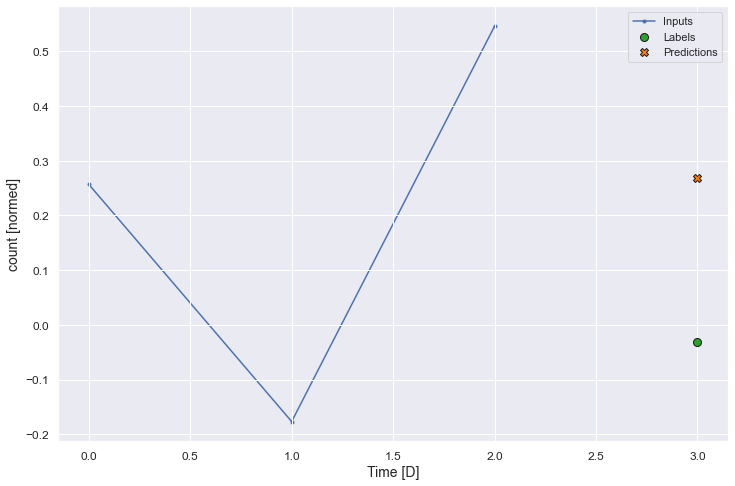

In [ ]:
conv_window.plot(multi_step_dense)

The main down-side of this approach is that the resulting model can only be executed on input windows of exactly this shape.

In [ ]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 30, 1)

ValueError:Exception encountered when calling layer "sequential_17" "                 f"(type Sequential).

Input 0 of layer "dense_32" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (32, 30)

Call arguments received by layer "sequential_17" "                 f"(type Sequential):
  • inputs=tf.Tensor(shape=(32, 30, 1), dtype=float32)
  • training=False
  • mask=None


## Convolution neural network
A convolution layer (tf.keras.layers.Conv1D) also takes multiple time steps as input to each prediction.

Below is the same model as multi_step_dense, re-written with a convolution.

Note the changes:

The tf.keras.layers.Flatten and the first tf.keras.layers.Dense are replaced by a tf.keras.layers.Conv1D.
The tf.keras.layers.Reshape is no longer necessary since the convolution keeps the time axis in its output

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 1)
Output shape: (32, 1, 1)


Train and evaluate it on the conv_window and it should give performance similar to the multi_step_dense model.

In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

20/20 [==============================] - 0s 2ms/step - loss: 0.7836 - mean_absolute_error: 0.6977


The difference between this conv_model and the multi_step_dense model is that the conv_model can be run on inputs of any length. The convolutional layer is applied to a sliding window of inputs:

Executing a convolutional model on a sequence

If you run it on wider input, it produces wider output:

In [ ]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 30, 1)
Labels shape: (32, 30, 1)
Output shape: (32, 28, 1)


Note that the output is shorter than the input. To make training or plotting work, you need the labels, and prediction to have the same length. So build a WindowGenerator to produce wide windows with a few extra input time steps so the label and prediction lengths match:

In [ ]:
LABEL_WIDTH = 30
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['count'])

wide_conv_window

Total window size: 33
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32]
Label column name(s): ['count']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 32, 1)
Labels shape: (32, 30, 1)
Output shape: (32, 30, 1)


Now, you can plot the model's predictions on a wider window. Note the 3 input time steps before the first prediction. Every prediction here is based on the 3 preceding time steps:

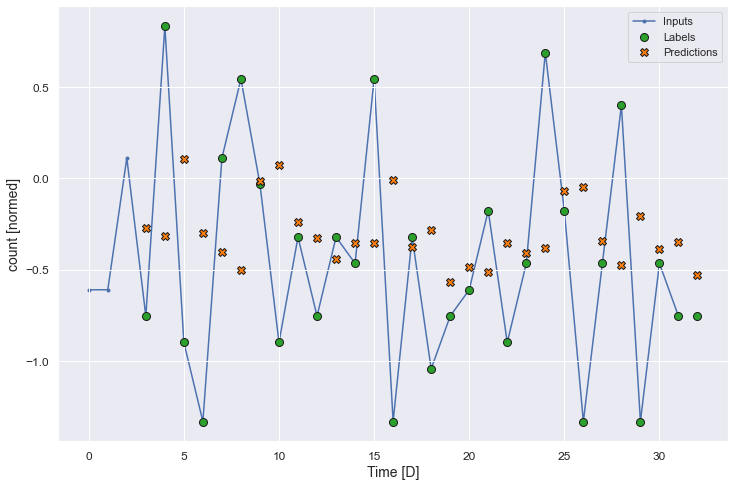

In [ ]:
wide_conv_window.plot(conv_model)

## Recurrent neural network
A Recurrent Neural Network (RNN) is a type of neural network well-suited to time series data. RNNs process a time series step-by-step, maintaining an internal state from time-step to time-step.

You can learn more in the Text generation with an RNN tutorial and the Recurrent Neural Networks (RNN) with Keras guide.

In this tutorial, you will use an RNN layer called Long Short-Term Memory (tf.keras.layers.LSTM).

An important constructor argument for all Keras RNN layers, such as tf.keras.layers.LSTM, is the return_sequences argument. This setting can configure the layer in one of two ways:

If False, the default, the layer only returns the output of the final time step, giving the model time to warm up its internal state before making a single prediction:
An LSTM warming up and making a single prediction

If True, the layer returns an output for each input. This is useful for:
Stacking RNN layers.
Training a model on multiple time steps simultaneously.

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 30, 1)
Output shape: (32, 30, 1)


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

19/19 [==============================] - 0s 5ms/step - loss: 0.7322 - mean_absolute_error: 0.6716


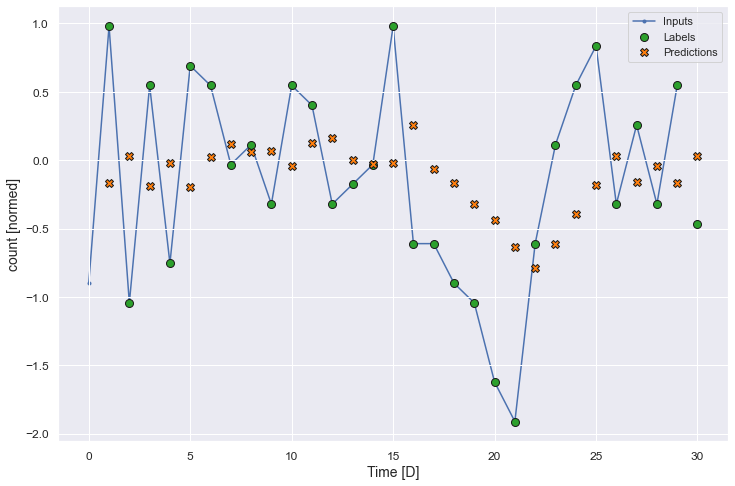

In [ ]:
wide_window.plot(lstm_model)

## Performance
With this dataset typically each of the models does slightly better than the one before it:

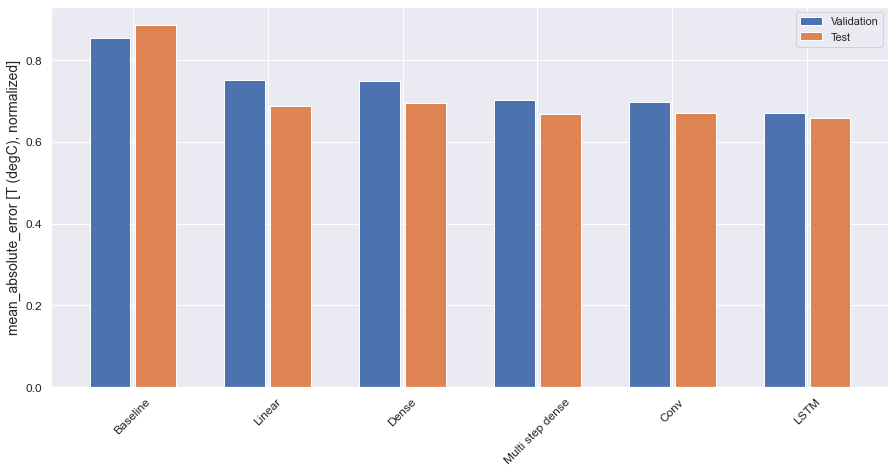

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.8867
Linear      : 0.6882
Dense       : 0.6945
Multi step dense: 0.6692
Conv        : 0.6708
LSTM        : 0.6592


# Advanced: Residual connections
The Baseline model from earlier took advantage of the fact that the sequence doesn't change drastically from time step to time step. Every model trained in this tutorial so far was randomly initialized, and then had to learn that the output is a a small change from the previous time step.

While you can get around this issue with careful initialization, it's simpler to build this into the model structure.

It's common in time series analysis to build models that instead of predicting the next value, predict how the value will change in the next time step. Similarly, residual networks—or ResNets—in deep learning refer to architectures where each layer adds to the model's accumulating result.

That is how you take advantage of the knowledge that the change should be small.

A model with a residual connection

Essentially, this initializes the model to match the Baseline. For this task it helps models converge faster, with slightly better performance.

This approach can be used in conjunction with any model discussed in this tutorial.

Here, it is being applied to the LSTM model, note the use of the tf.initializers.zeros to ensure that the initial predicted changes are small, and don't overpower the residual connection. There are no symmetry-breaking concerns for the gradients here, since the zeros are only used on the last layer.

In [ ]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [ ]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

19/19 [==============================] - 0s 5ms/step - loss: 0.7370 - mean_absolute_error: 0.6721

CPU times: total: 6.88 s
Wall time: 12.2 s


Performance
Here is the overall performance for these multi-output models.

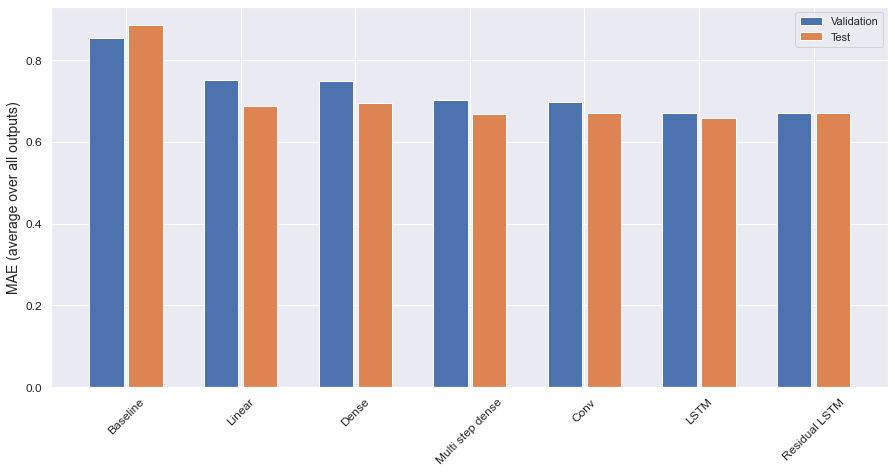

In [ ]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.8867
Linear         : 0.6882
Dense          : 0.6945
Multi step dense: 0.6692
Conv           : 0.6708
LSTM           : 0.6592
Residual LSTM  : 0.6713


# Multi-step models
Both the single-output and multiple-output models in the previous sections made single time step predictions, one day into the future.

This section looks at how to expand these models to make multiple time step predictions.

In a multi-step prediction, the model needs to learn to predict a range of future values. Thus, unlike a single step model, where only a single future point is predicted, a multi-step model predicts a sequence of the future values.

There are two rough approaches to this:

Single shot predictions where the entire time series is predicted at once.
Autoregressive predictions where the model only makes single step predictions and its output is fed back as its input.
In this section all the models will predict all the features across all output time steps.

For the multi-step model, the training data again consists of hourly samples. However, here, the models will learn to predict 30 days into the future, given 30 days of the past.

Here is a Window object that generates these slices from the dataset:

Total window size: 60
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Label column name(s): None

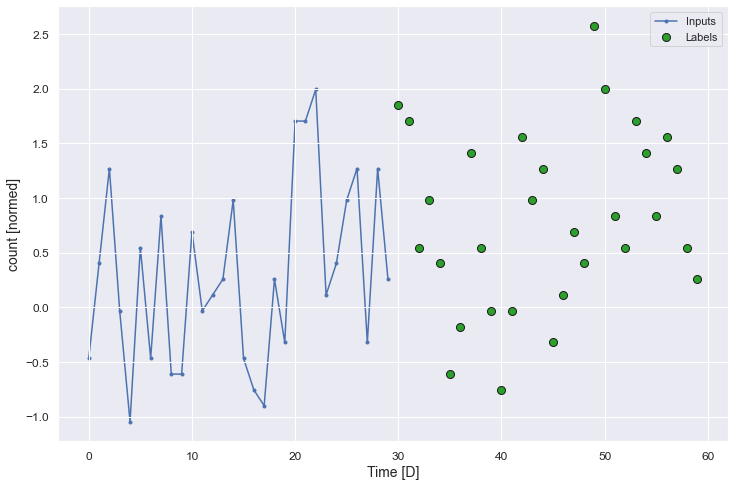

In [ ]:
OUT_STEPS = 30
multi_window = WindowGenerator(input_width=30,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

## Baselines
A simple baseline for this task is to repeat the last input time step for the required number of output time steps:

18/18 [==============================] - 0s 2ms/step - loss: 1.3847 - mean_absolute_error: 0.9291


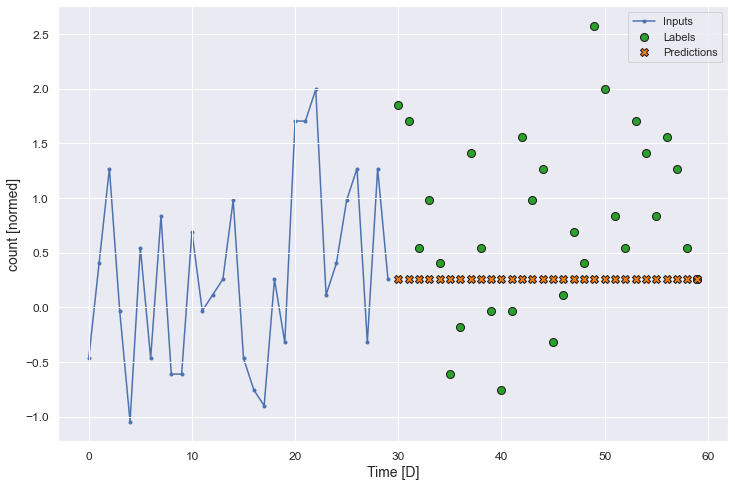

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

Since this task is to predict 30 days into the future, given 30 days of the past, another simple approach is to repeat the previous day, assuming tomorrow will be similar:

18/18 [==============================] - 0s 2ms/step - loss: 1.3937 - mean_absolute_error: 0.9300


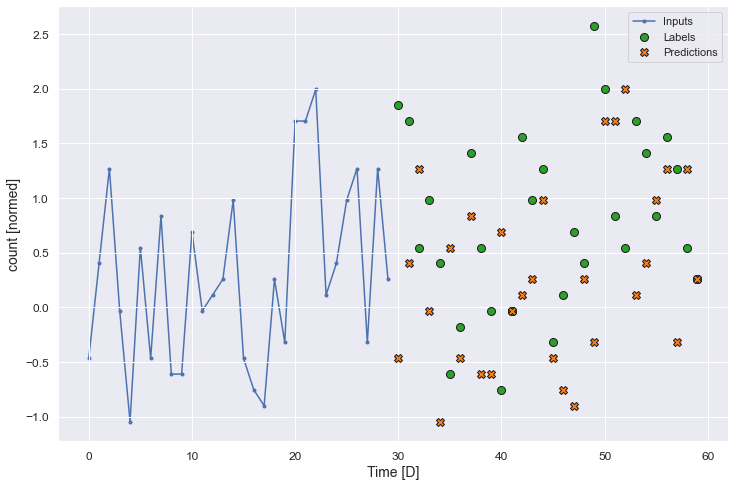

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

## Single-shot models
One high-level approach to this problem is to use a "single-shot" model, where the model makes the entire sequence prediction in a single step.

This can be implemented efficiently as a tf.keras.layers.Dense with OUT_STEPS*features output units. The model just needs to reshape that output to the required (OUTPUT_STEPS, features).

## Linear
A simple linear model based on the last input time step does better than either baseline, but is underpowered. The model needs to predict OUTPUT_STEPS time steps, from a single input time step with a linear projection. It can only capture a low-dimensional slice of the behavior, likely based mainly on the time of day and time of year.

18/18 [==============================] - 0s 2ms/step - loss: 0.9743 - mean_absolute_error: 0.7899


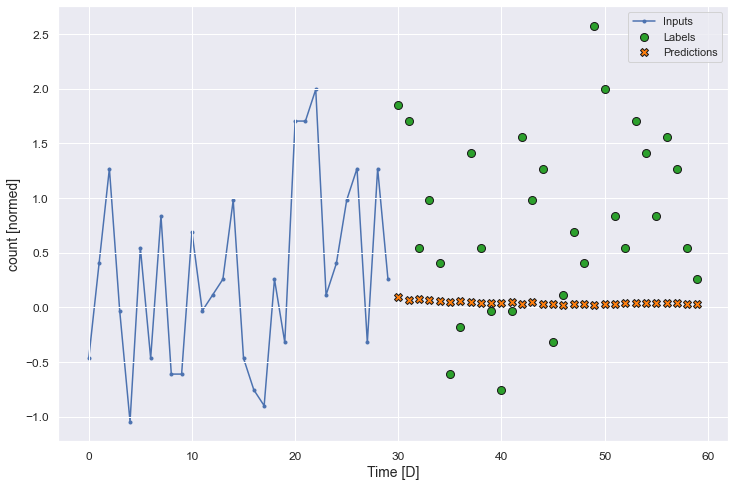

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

## Dense
Adding a tf.keras.layers.Dense between the input and output gives the linear model more power, but is still only based on a single input time step.

18/18 [==============================] - 0s 2ms/step - loss: 0.9658 - mean_absolute_error: 0.7860


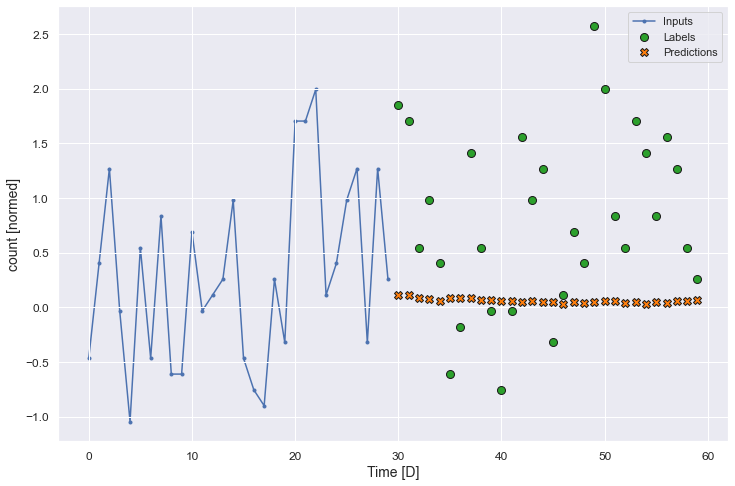

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

## CNN
A convolutional model makes predictions based on a fixed-width history, which may lead to better performance than the dense model since it can see how things are changing over time:

18/18 [==============================] - 0s 2ms/step - loss: 0.8935 - mean_absolute_error: 0.7551


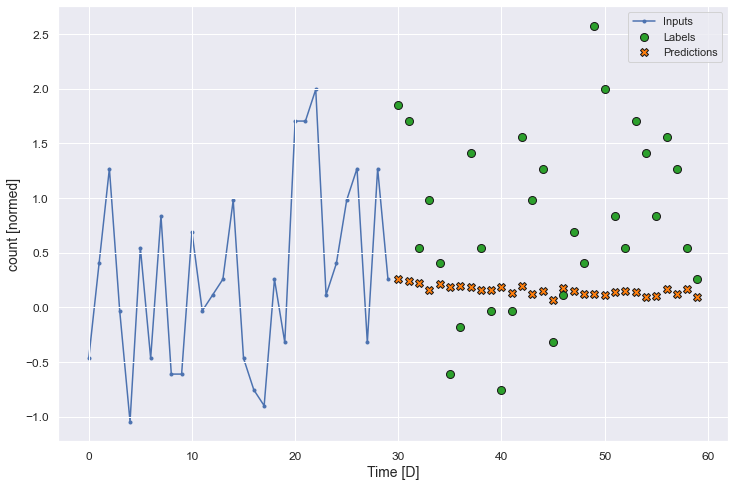

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

## RNN
A recurrent model can learn to use a long history of inputs, if it's relevant to the predictions the model is making. Here the model will accumulate internal state for 30 days, before making a single prediction for the next 30 days.

In this single-shot format, the LSTM only needs to produce an output at the last time step, so set return_sequences=False in tf.keras.layers.LSTM.

18/18 [==============================] - 0s 6ms/step - loss: 0.8064 - mean_absolute_error: 0.7109


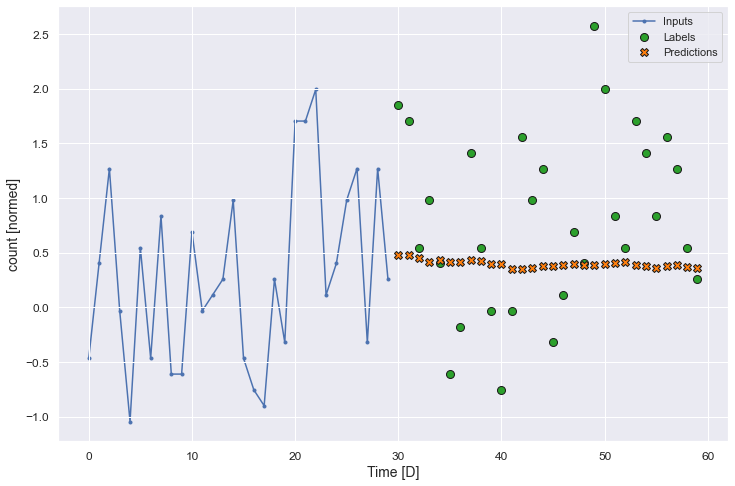

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

# Advanced: Autoregressive model
The above models all predict the entire output sequence in a single step.

In some cases it may be helpful for the model to decompose this prediction into individual time steps. Then, each model's output can be fed back into itself at each step and predictions can be made conditioned on the previous one, like in the classic Generating Sequences With Recurrent Neural Networks.

One clear advantage to this style of model is that it can be set up to produce output with a varying length.

You could take any of the single-step multi-output models trained in the first half of this tutorial and run in an autoregressive feedback loop, but here you'll focus on building a model that's been explicitly trained to do that.

## RNN
This tutorial only builds an autoregressive RNN model, but this pattern could be applied to any model that was designed to output a single time step.

The model will have the same basic form as the single-step LSTM models from earlier: a tf.keras.layers.LSTM layer followed by a tf.keras.layers.Dense layer that converts the LSTM layer's outputs to model predictions.

A tf.keras.layers.LSTM is a tf.keras.layers.LSTMCell wrapped in the higher level tf.keras.layers.RNN that manages the state and sequence results for you (Check out the Recurrent Neural Networks (RNN) with Keras guide for details).

In this case, the model has to manually manage the inputs for each step, so it uses tf.keras.layers.LSTMCell directly for the lower level, single time step interface.

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

The first method this model needs is a warmup method to initialize its internal state based on the inputs. Once trained, this state will capture the relevant parts of the input history. This is equivalent to the single-step LSTM model from earlier:

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

This method returns a single time-step prediction and the internal state of the LSTM:

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 1])

With the RNN's state, and an initial prediction you can now continue iterating the model feeding the predictions at each step back as the input.

The simplest approach for collecting the output predictions is to use a Python list and a tf.stack after the loop.

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

Test run this model on the example inputs:

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 30, 1)


Now, train the model:

18/18 [==============================] - 0s 8ms/step - loss: 0.8094 - mean_absolute_error: 0.7104


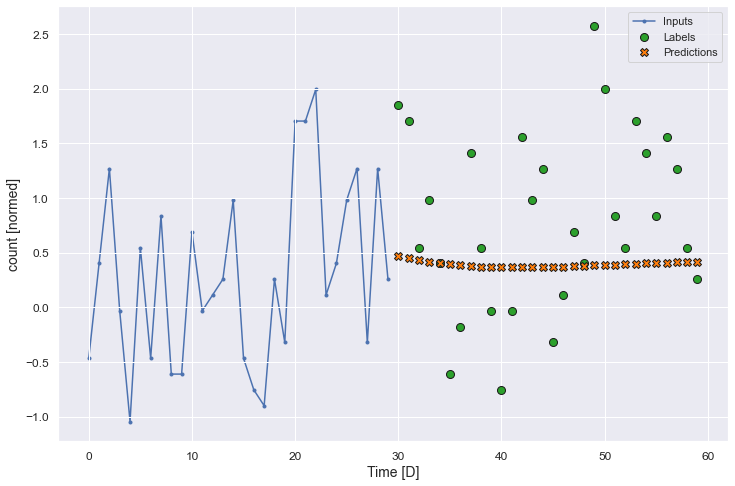

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

## Performance
There are clearly diminishing returns as a function of model complexity on this problem:

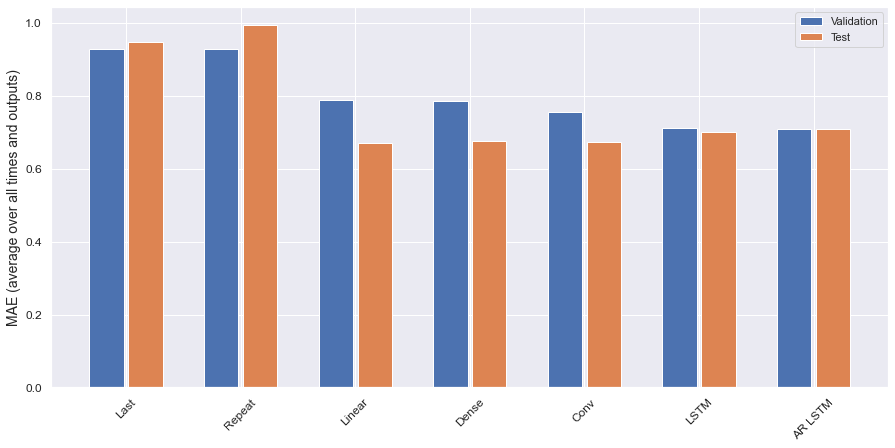

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 0.9479
Repeat  : 0.9946
Linear  : 0.6722
Dense   : 0.6758
Conv    : 0.6737
LSTM    : 0.7000
AR LSTM : 0.7101
